In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

# Input Data

In [2]:
Data = pd.read_excel('Geophysical_Logs_Well_1.xlsx', sheet_name='Well_1')
Data

,DEPTH,Gamma Ray (GR),Deep Resisitivity (RT),Medium Resistivity (RM),Shallow Resistivity (RS),Density (RHOB),Neutron Porosity (NPHI),Total Porosity (PHIT),Effective Porosity (PHIE),Clay Volume (VCL),Permeability (Perm),Water Saturation (SW)
0,2460.0408,999.0,0.1112,6.4929,1000.0000,2.5029,999.0,999.0,999.0,999.0,999.0,999.0
1,2460.1932,999.0,0.1000,2.6585,0.1000,2.5176,999.0,999.0,999.0,999.0,999.0,999.0
2,2460.3456,999.0,1000.0000,0.5924,0.1000,2.5324,999.0,999.0,999.0,999.0,999.0,999.0
3,2460.4980,999.0,0.1000,26.8645,1.2794,2.5471,999.0,999.0,999.0,999.0,999.0,999.0
4,2460.6504,999.0,1000.0000,43.9040,1.0699,2.5618,0.3,999.0,999.0,999.0,999.0,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9550,3915.4608,NaN,1.3597,1.3242,1.3526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9551,3915.6132,NaN,1.1437,1.1155,1.1315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9552,3915.7656,NaN,1.1244,1.0991,1.1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9553,3915.9180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Data.describe()

,DEPTH,Gamma Ray (GR),Deep Resisitivity (RT),Medium Resistivity (RM),Shallow Resistivity (RS),Density (RHOB),Neutron Porosity (NPHI),Total Porosity (PHIT),Effective Porosity (PHIE),Clay Volume (VCL),Permeability (Perm),Water Saturation (SW)
count,9555.000000,9480.000000,9553.000000,9520.000000,9553.000000,9507.000000,9495.000000,9476.000000,9475.000000,9480.000000,9475.000000,9420.000000
mean,3188.055600,69.175904,3.297404,2.736170,2.715624,2.506221,0.675921,0.659461,0.601745,1.077924,2.829741,5.497560
std,420.385531,29.040147,20.464314,2.131118,14.470581,0.072074,20.496017,22.939780,22.942360,22.926128,24.607244,67.281464
min,2460.040800,12.885400,0.100000,0.000500,0.100000,2.235100,0.049500,0.000000,0.000000,0.010000,0.000000,0.191900
25%,2824.048200,57.224375,1.974800,1.919075,1.866000,2.469250,0.223200,0.104900,0.028400,0.411700,0.000000,1.000000
50%,3188.055600,67.144700,2.614900,2.557250,2.382800,2.525200,0.251600,0.126400,0.056100,0.589200,0.001500,1.000000
75%,3552.063000,76.895425,3.361200,3.241700,3.021000,2.557500,0.280000,0.154400,0.118000,0.694300,0.248900,1.000000
max,3916.070400,999.000000,1000.000000,123.834800,1000.000000,3.092100,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


In [4]:
Data.shape

(9555, 12)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9555 entries, 0 to 9554
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DEPTH                      9555 non-null   float64
 1   Gamma Ray (GR)             9480 non-null   float64
 2   Deep Resisitivity (RT)     9553 non-null   float64
 3   Medium Resistivity (RM)    9520 non-null   float64
 4   Shallow Resistivity (RS)   9553 non-null   float64
 5   Density (RHOB)             9507 non-null   float64
 6   Neutron Porosity (NPHI)    9495 non-null   float64
 7   Total Porosity (PHIT)      9476 non-null   float64
 8   Effective Porosity (PHIE)  9475 non-null   float64
 9   Clay Volume (VCL)          9480 non-null   float64
 10  Permeability (Perm)        9475 non-null   float64
 11  Water Saturation (SW)      9420 non-null   float64
dtypes: float64(12)
memory usage: 895.9 KB


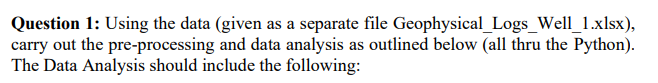

# Missing Data Handling

C:\Users\YUSIFOH\AppData\Local\Temp\ipykernel_29820\3764222334.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


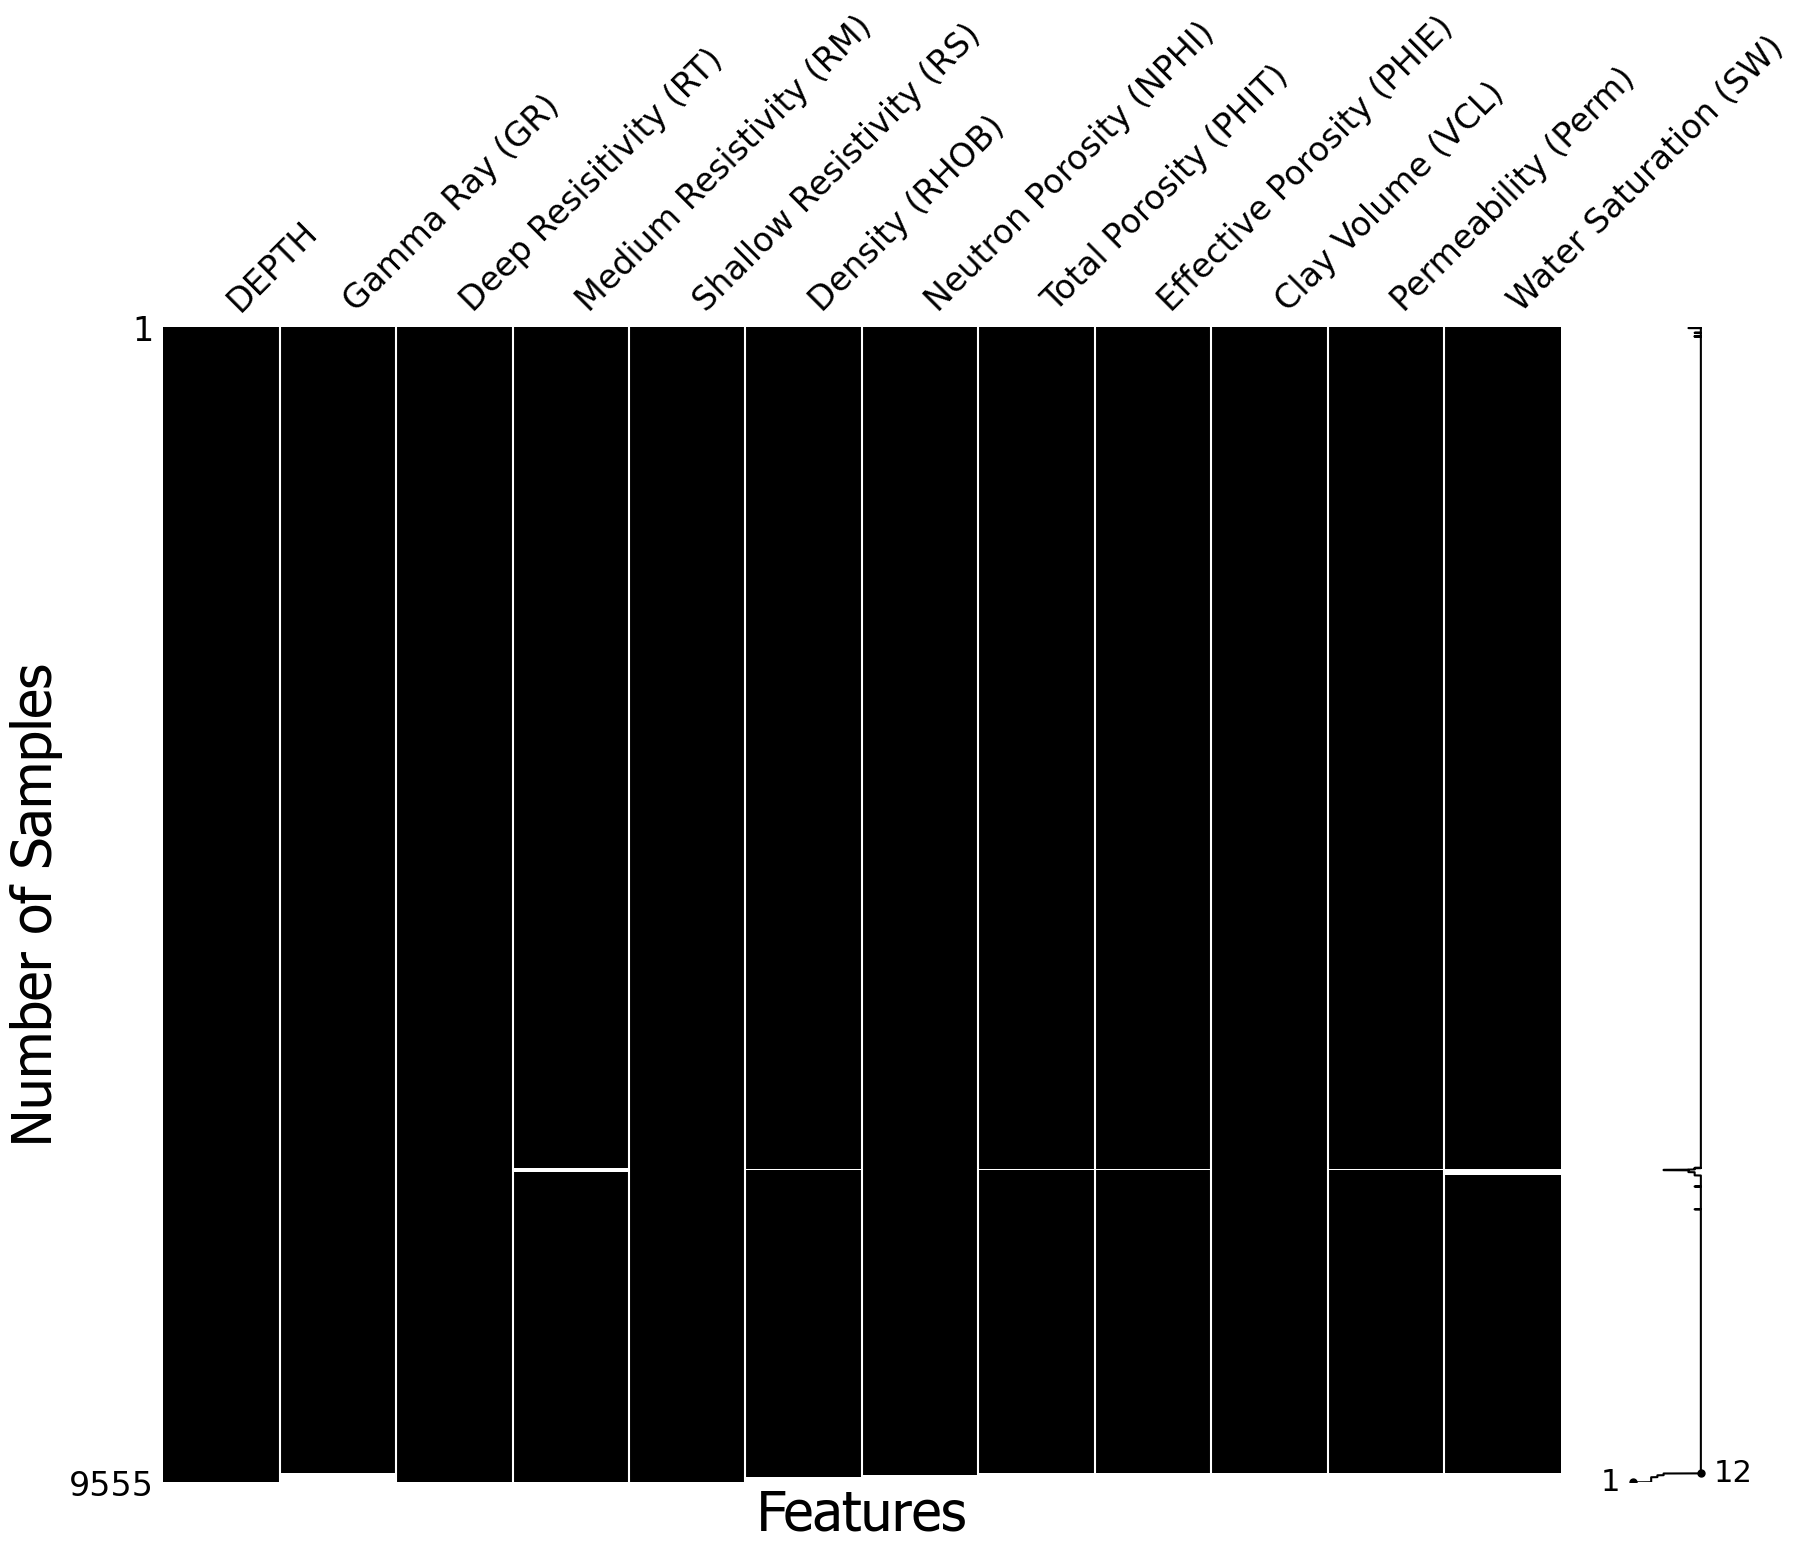

In [6]:
## Missing Data Visualization (Before Handling)

msno.matrix(Data,figsize=(20, 15),color=(0,0,0),
            fontsize=26, sparkline=True);
plt.tick_params(axis='y', labelsize=24, color='k')
plt.tick_params(axis='x', labelsize=24,color='k')
plt.xlabel("Features", fontsize=40,fontname='tahoma')
plt.ylabel("Number of Samples", fontsize=40,fontname='tahoma')
plt.tight_layout()
plt.show()

In [7]:
# Number of Missing Data for Each Feature
Data.isna().sum()

DEPTH                          0
Gamma Ray (GR)                75
Deep Resisitivity (RT)         2
Medium Resistivity (RM)       35
Shallow Resistivity (RS)       2
Density (RHOB)                48
Neutron Porosity (NPHI)       60
Total Porosity (PHIT)         79
Effective Porosity (PHIE)     80
Clay Volume (VCL)             75
Permeability (Perm)           80
Water Saturation (SW)        135
dtype: int64

In [8]:
def MissingDataSummarizer(Data):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables  = []
    dtypes     = []
    count      = []
    unique     = []
    missing    = []
    
    for item in Data.columns:
        
        variables.append(item)
        dtypes.append(Data[item].dtype)
        count.append(len(Data[item]))
        unique.append(len(Data[item].unique()))
        missing.append(Data[item].isna().sum())

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
    })    
        
    return output

In [9]:
MissingDataSummarizer(Data)

,variable,dtype,count,unique,missing
0,DEPTH,float64,9555,9555,0
1,Gamma Ray (GR),float64,9555,9379,75
2,Deep Resisitivity (RT),float64,9555,8391,2
3,Medium Resistivity (RM),float64,9555,8383,35
4,Shallow Resistivity (RS),float64,9555,8225,2
5,Density (RHOB),float64,9555,2677,48
6,Neutron Porosity (NPHI),float64,9555,2010,60
7,Total Porosity (PHIT),float64,9555,1574,79
8,Effective Porosity (PHIE),float64,9555,2038,80
9,Clay Volume (VCL),float64,9555,5179,75


In [10]:
# Dropping Rows that have missing data
Data= Data.dropna(axis=0, how='any')

In [11]:
MissingDataSummarizer(Data)

,variable,dtype,count,unique,missing
0,DEPTH,float64,9408,9408,0
1,Gamma Ray (GR),float64,9408,9308,0
2,Deep Resisitivity (RT),float64,9408,8289,0
3,Medium Resistivity (RM),float64,9408,8293,0
4,Shallow Resistivity (RS),float64,9408,8138,0
5,Density (RHOB),float64,9408,2658,0
6,Neutron Porosity (NPHI),float64,9408,1998,0
7,Total Porosity (PHIT),float64,9408,1571,0
8,Effective Porosity (PHIE),float64,9408,2035,0
9,Clay Volume (VCL),float64,9408,5153,0


C:\Users\YUSIFOH\AppData\Local\Temp\ipykernel_29820\874066275.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


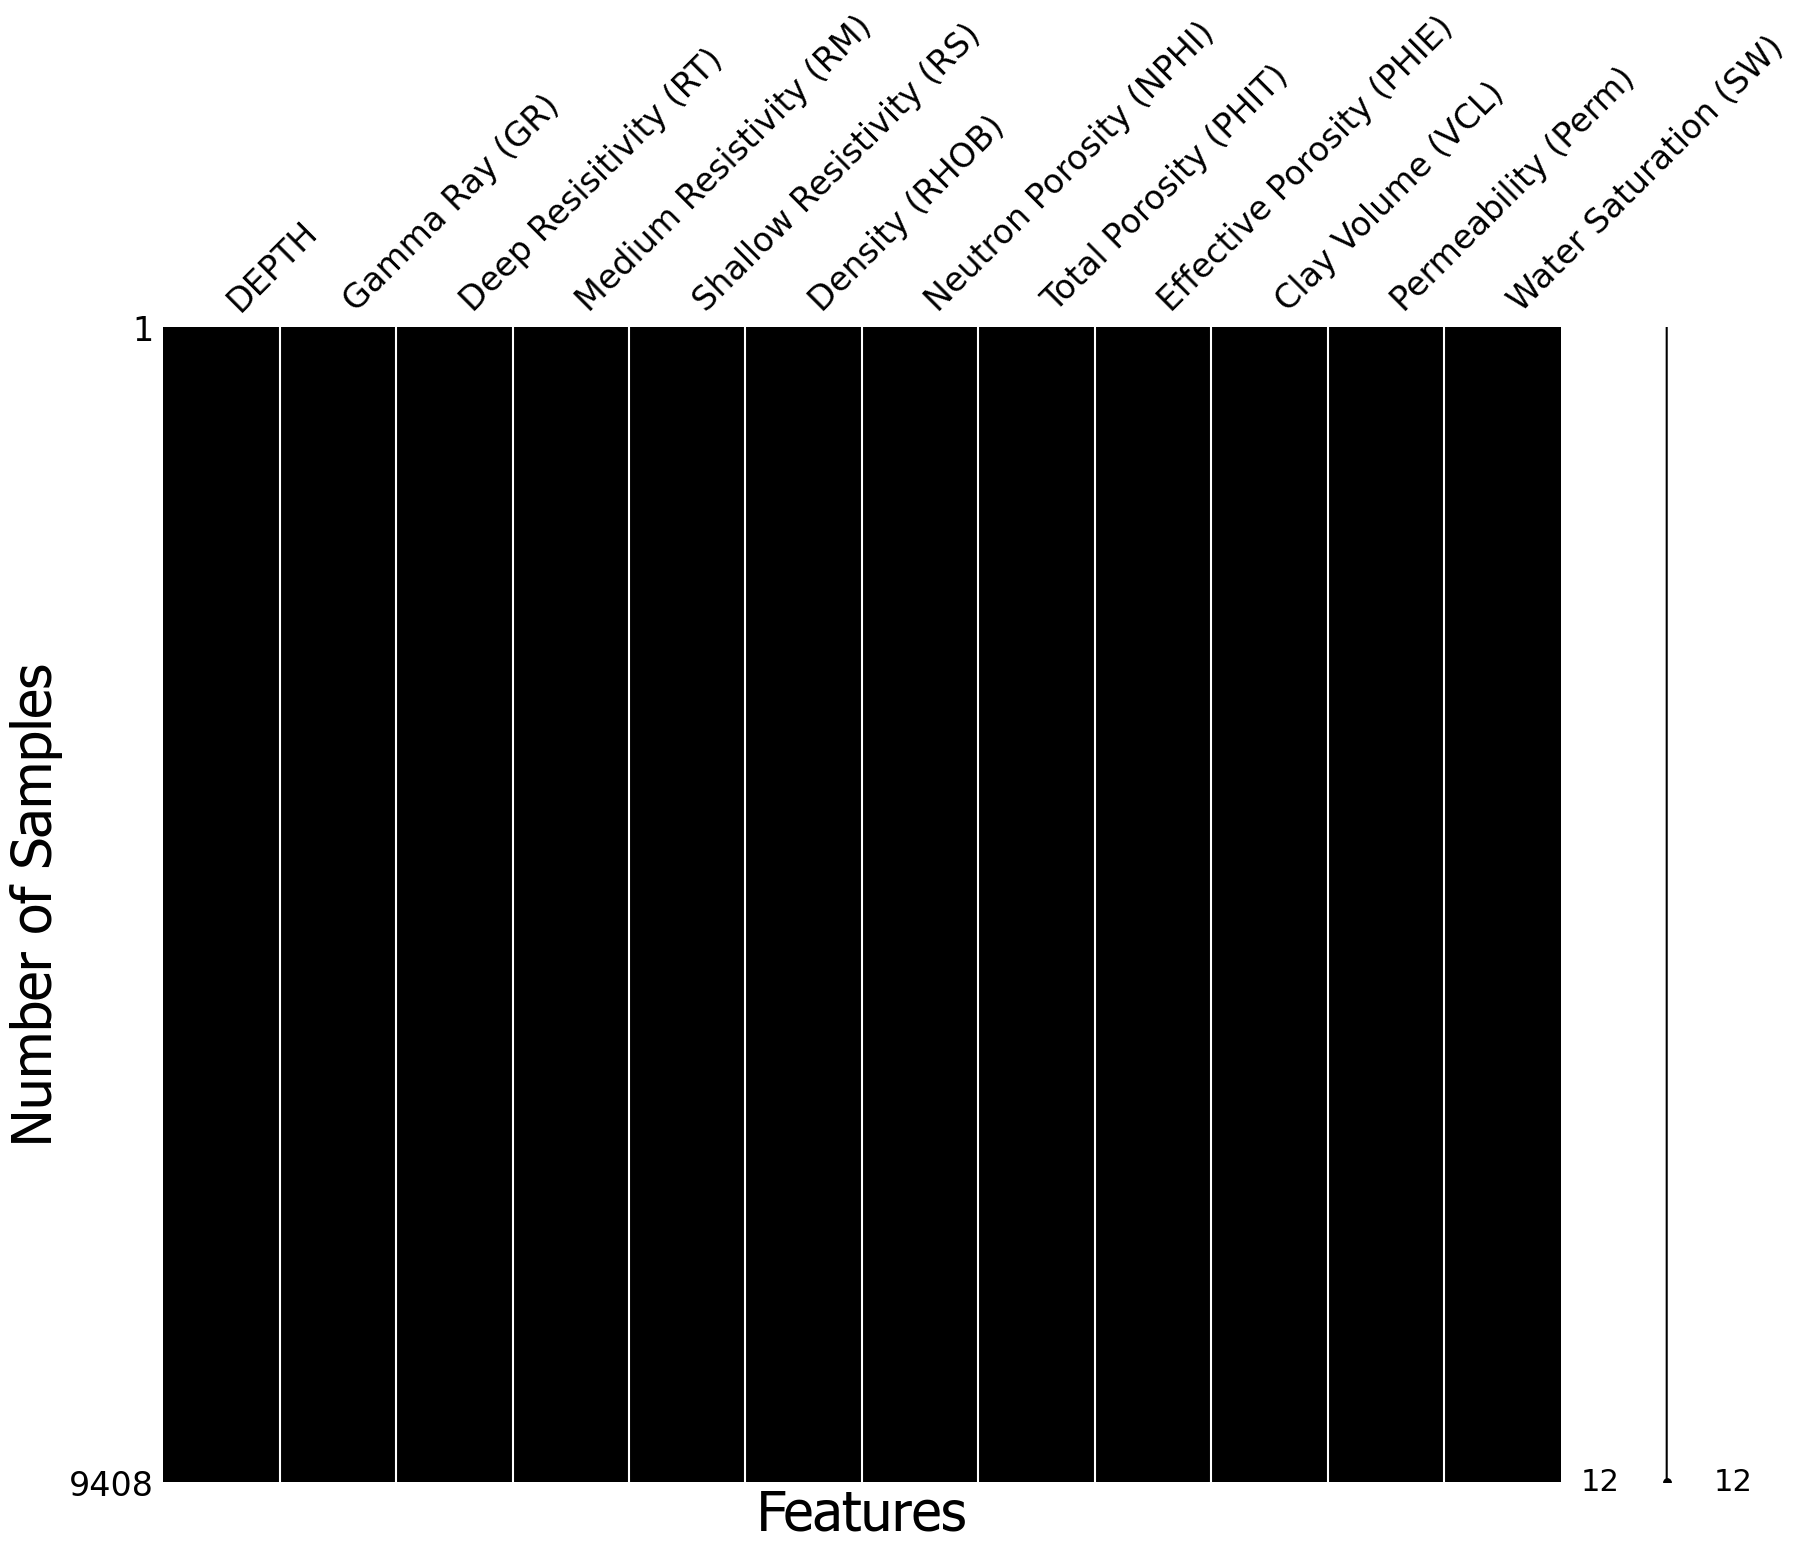

In [12]:
## Missing Data Visualization (After Handling)

msno.matrix(Data,figsize=(20, 15),color=(0,0,0),
            fontsize=26, sparkline=True);
plt.tick_params(axis='y', labelsize=24, color='k')
plt.tick_params(axis='x', labelsize=24,color='k')
plt.xlabel("Features", fontsize=40,fontname='tahoma')
plt.ylabel("Number of Samples", fontsize=40,fontname='tahoma')
plt.tight_layout()
plt.show()

In [13]:
Data.describe()

,DEPTH,Gamma Ray (GR),Deep Resisitivity (RT),Medium Resistivity (RM),Shallow Resistivity (RS),Density (RHOB),Neutron Porosity (NPHI),Total Porosity (PHIT),Effective Porosity (PHIE),Clay Volume (VCL),Permeability (Perm),Water Saturation (SW)
count,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000
mean,3180.380038,69.148118,3.211754,2.751543,2.731611,2.506439,0.679563,0.663267,0.605262,1.083062,2.845130,5.397216
std,417.290210,27.503931,17.876961,2.105250,14.580622,0.071819,20.590541,23.022499,23.023878,23.013621,24.693758,66.540284
min,2460.040800,12.885400,0.100000,0.002700,0.100000,2.283200,0.049500,0.000000,0.000000,0.010000,0.000000,0.191900
25%,2819.361900,57.303525,1.987275,1.944225,1.881925,2.469600,0.223100,0.104900,0.028300,0.413625,0.000000,1.000000
50%,3177.768600,67.204050,2.628950,2.568600,2.399650,2.525600,0.251300,0.126300,0.055800,0.590750,0.001400,1.000000
75%,3545.928900,76.998775,3.376325,3.251775,3.031375,2.557500,0.279925,0.154600,0.117125,0.694725,0.239025,1.000000
max,3904.640400,999.000000,1000.000000,123.834800,1000.000000,3.092100,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


In [14]:
Depth = np.array(Data['DEPTH'])
GR    = np.array(Data['Gamma Ray (GR)'])
RT    = np.array(Data['Deep Resisitivity (RT)'])
RM    = np.array(Data['Medium Resistivity (RM)'])
RS    = np.array(Data['Shallow Resistivity (RS)'])
RHOB  = np.array(Data['Density (RHOB)'])
NPHI  = np.array(Data['Neutron Porosity (NPHI)'])
PHIT  = np.array(Data['Total Porosity (PHIT)'])
PHIE  = np.array(Data['Effective Porosity (PHIE)'])
VCL   = np.array(Data['Clay Volume (VCL)'])
Perm  = np.array(Data['Permeability (Perm)'])
SW    = np.array(Data['Water Saturation (SW)'])

In [15]:
def DataAnalysisResults(Data,Cov_Matrix = True, Corr = True, target = 'Permeability (Perm)'):

    """Using the Input format of pandas DataFrame and output is Dictionary, heat map of correlation coeff and Covariance Matrix of Dataset, uses additional libraries : numpy, scipy and seaborn"""
    Columns = np.array(Data.columns)
    Data_Dict = {}
    for c in Columns:
        aux = {}
    # 1. Maximum:
        aux['Max            '] =   np.max(np.array(Data[c]))
    # 2. Minimumn:
        aux['Min            '] =   np.min(np.array(Data[c]))
    ## 3.1. Arithmetic:
        aux['Mean_Arth      '] =   np.mean(np.array(Data[c]))
    ## 3.2. Geometric: (Due to Overflow Mapping from number to log then from log to number is used ) (Only used for Positive numbers)
        aux['Mean_Geom      '] =   np.exp(np.sum(np.log(np.array(Data[c])[np.where(np.array(Data[c])>0)]))/len(np.array(Data[c])))
    ## 3.3. Harmonic Means: (Only used for Positive numbers)
        aux['Mean_Harm      '] =   len(np.array(Data[c])[np.where(np.array(Data[c])>0)])/np.sum(1/np.array(Data[c])[np.where(np.array(Data[c])>0)])
    # 4. Mode:
        aux['Mode           '] =   scipy.stats.mode(np.array(Data[c]))
    # 5. Range:
        aux['Range          '] =   np.max(np.array(Data[c])) - np.min(np.array(Data[c]))
    # 6. Mid-Range: 
        aux['Mid_Range      '] =   (np.max(np.array(Data[c])) + np.min(np.array(Data[c])))/2
    # 7. Variance:
        aux['Variance       '] =   np.sum((np.array(Data[c])-np.mean(np.array(Data[c])))**2)/len(np.array(Data[c]))
    # 8. IQR
        aux['Q1'             ] =   np.quantile(np.array(Data[c]), 0.25)
        aux['Q3'             ] =   np.quantile(np.array(Data[c]), 0.75)
        aux['IQR            '] =   aux['Q3'             ] - aux['Q1'             ]
    # 9. Standard Deviation:
        aux['Stand_Dev      '] =   np.sqrt(np.sum((np.array(Data[c])-np.mean(np.array(Data[c])))**2)/len(np.array(Data[c])))
    # 10. Skewness:
        aux['Skewness       '] =   Data[c].skew()
    # 11. Kurtosis:
        aux['Kurtosis       '] =   Data[c].kurt()
    # 13. Coefficient of Variation: CV = STD/MEAN
        aux['Coeff_Variation'] =   (np.sqrt(np.sum((np.array(Data[c])-np.mean(np.array(Data[c])))**2)/len(np.array(Data[c]))))/np.mean(np.array(Data[c]))
    
        Data_Dict[c] = aux

# 12. Covariance:
    if Cov_Matrix:
        print(pd.DataFrame(Data.cov()))

# 14. Correlation Coefficient Analysis:
    if Corr:
        fig, ax = plt.subplots(2,2, figsize=(20, 9))
        corr1 = Data.corr('pearson')[[target]].sort_values(by=target, ascending=False)
        corr2 = Data.corr('spearman')[[target]].sort_values(by=target, ascending=False)
        corr3 = Data.corr('kendall')[[target]].sort_values(by=target, ascending=False)
        sns.heatmap(corr1, ax=ax[0, 0], annot=True, vmin= -1, vmax = 1).set(title='pearson correlation')
        sns.heatmap(corr2, ax=ax[0, 1], annot=True, vmin= -1, vmax = 1).set(title='spearman correlation')
        sns.heatmap(corr3, ax=ax[1, 0], annot=True, vmin= -1, vmax = 1).set(title='kendall correlation')
    return Data_Dict



                                   DEPTH  Gamma Ray (GR)  \
DEPTH                      174131.119154     3541.160264   
Gamma Ray (GR)               3541.160264      756.466200   
Deep Resisitivity (RT)        -26.294926      189.950014   
Medium Resistivity (RM)        97.816414        3.971982   
Shallow Resistivity (RS)      -83.523739       94.236442   
Density (RHOB)                  6.090115        0.649378   
Neutron Porosity (NPHI)      -304.171267      395.304048   
Total Porosity (PHIT)        -384.786369      493.446977   
Effective Porosity (PHIE)    -384.899477      493.105598   
Clay Volume (VCL)            -380.945334      495.806162   
Permeability (Perm)          -238.723910      441.016864   
Water Saturation (SW)       -3216.043281      368.304057   

                           Deep Resisitivity (RT)  Medium Resistivity (RM)  \
DEPTH                                  -26.294926                97.816414   
Gamma Ray (GR)                         189.950014              

,DEPTH,Gamma Ray (GR),Deep Resisitivity (RT),Medium Resistivity (RM),Shallow Resistivity (RS),Density (RHOB),Neutron Porosity (NPHI),Total Porosity (PHIT),Effective Porosity (PHIE),Clay Volume (VCL),Permeability (Perm),Water Saturation (SW)
Max,3904.6404,999.0,1000.0,123.8348,1000.0,3.0921,999.0,999.0,999.0,999.0,999.0,999.0
Min,2460.0408,12.8854,0.1,0.0027,0.1,2.2832,0.0495,0.0,0.0,0.01,0.0,0.1919
Mean_Arth,3180.380038,69.148118,3.211754,2.751543,2.731611,2.506439,0.679563,0.663267,0.605262,1.083062,2.84513,5.397216
Mean_Geom,3152.726019,66.674977,2.588045,2.483818,2.330628,2.505395,0.251839,0.128919,0.058139,0.506687,0.070808,0.94947
Mean_Harm,3124.956333,64.540854,2.305869,2.062165,2.123467,2.504335,0.246869,0.121718,0.022516,0.415915,0.000621,0.887188
Mode,"(2460.0408, 1)","(999.0, 5)","(2.5938, 7)","(2.0636, 5)","(1.6611, 6)","(2.5814, 20)","(0.2586, 22)","(0.1015, 25)","(0.0, 252)","(0.98, 63)","(0.0, 2539)","(1.0, 7829)"
Range,1444.5996,986.1146,999.9,123.8321,999.9,0.8089,998.9505,999.0,999.0,998.99,999.0,998.8081
Mid_Range,3182.3406,505.9427,500.05,61.91875,500.05,2.68765,499.52475,499.5,499.5,499.505,499.5,499.59595
Variance,174112.61032,756.385793,319.551783,4.431605,212.571933,0.005157,423.925332,529.979102,530.04262,529.570434,609.716881,4427.138813
Q1,2819.3619,57.303525,1.987275,1.944225,1.881925,2.4696,0.2231,0.1049,0.0283,0.413625,0.0,1.0


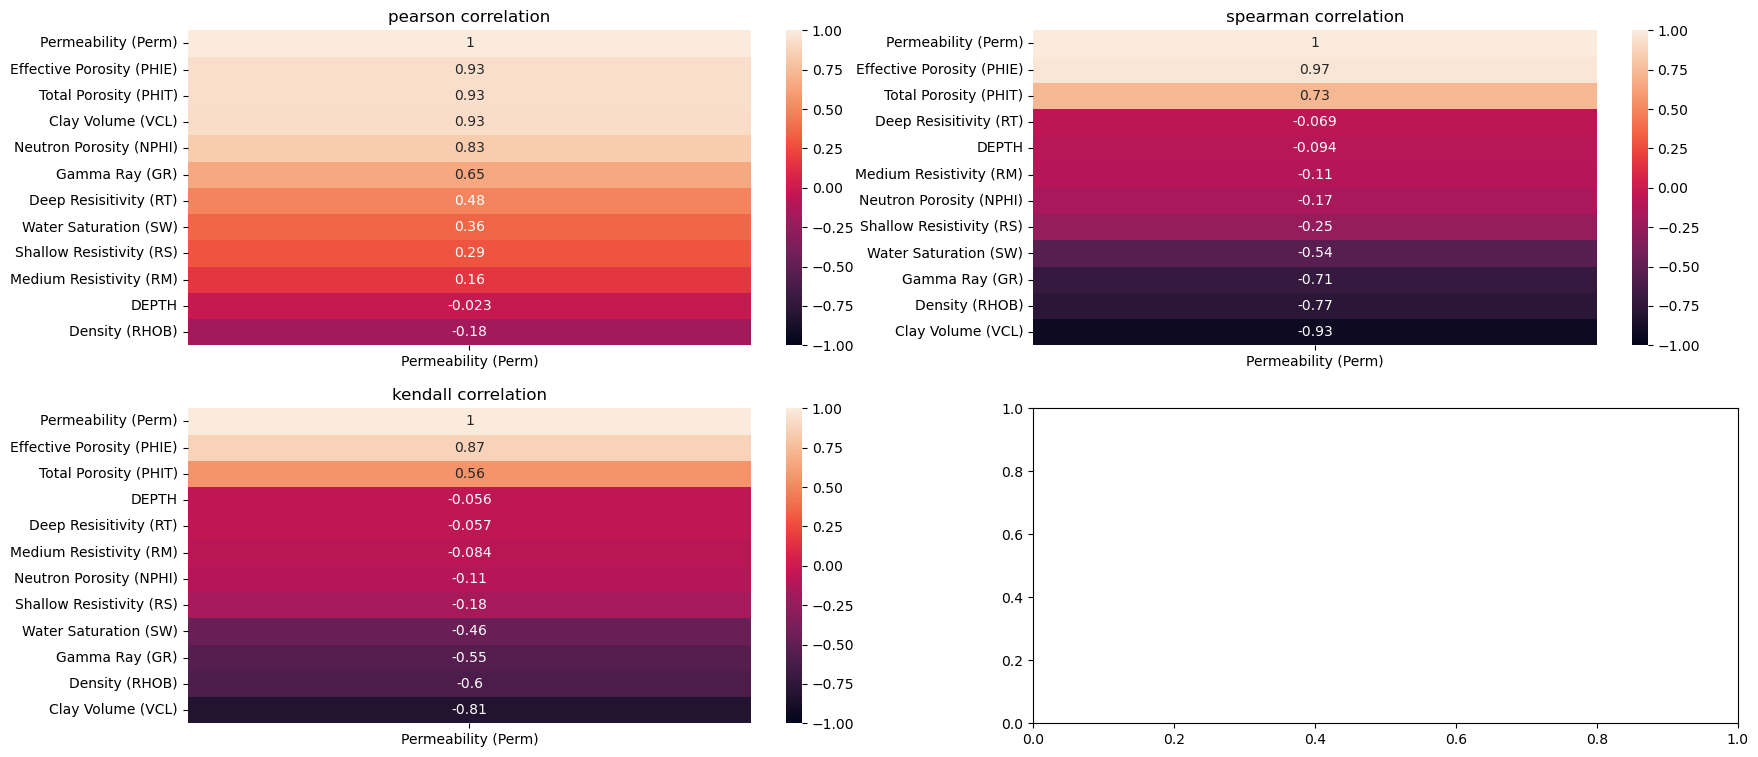

In [16]:
pd.DataFrame(DataAnalysisResults(Data))

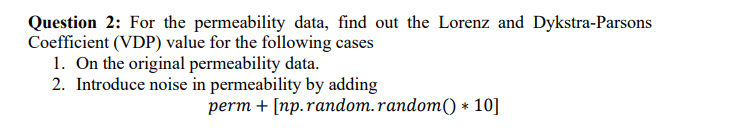

# Dykstra-Parsons Coefficien


V_DP = (K_50 - K_84.1)/K_50
This equation is used for descending order of K. But numpy's "percentile" function automatically turns the array into ascending order thats why i have used 16 as a quantile value 

To calculate Location and Scale parameters i have used method of moments (MoM)

![Screenshot 2024-03-03 20.21.38.png](<attachment:Screenshot 2024-03-03 20.21.38.png>)
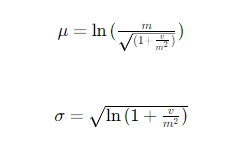

In [17]:
def Dykstra_Parsons_Coeff(X):   
    meanPerm = np.mean(X) #calculation of mean
    VariancePerm = np.var(X) #calculation of Variance

    mu = np.log((meanPerm**2)/np.sqrt(VariancePerm + meanPerm**2)) #calculation of LogNorm parameter mu
    sigma = np.sqrt(np.log(VariancePerm/(meanPerm**2)+1)) #calculation of LogNorm parameter sigma
    print('Lognormal distribution parameters are, mu: ' + str(np.round(mu,2)) + ', and sigma: ' + str(np.round(sigma,2)))
    # using scipy calculating P16 and P50 from Log-Normal Distribution
    P16_perm_lognorm = scipy.stats.lognorm.ppf(0.16,s = sigma, scale = np.exp(mu)) 
    P50_perm_lognorm = scipy.stats.lognorm.ppf(0.50,s = sigma, scale = np.exp(mu))

    print('Permeability P16 from Lognormal Parametric Distribution: ' + str(np.round(P16_perm_lognorm,3)))
    print('Permeability P50 from Lognormal Parametric Distribution: ' + str(np.round(P50_perm_lognorm,3)))
    #calculation of Dykstra-Parsons Coeff
    V_DP_LogNormal = (P50_perm_lognorm - P16_perm_lognorm)/P50_perm_lognorm
    print("Dykstra-Parsons Coefficient from LogNormal Fit V_Dp = {}".format(V_DP_LogNormal))
    return V_DP_LogNormal

# Dykstra-Parsons Coefficien (ORIGINAL DATA)

In [18]:
X = Perm[np.where(Perm>0)] #Input Data
print('Original Data')
V_DP_LogNormal = Dykstra_Parsons_Coeff(X)  #calculation of Dykstra-Parsons Coeff

Original Data
Lognormal distribution parameters are, mu: -0.65, and sigma: 2.01
Permeability P16 from Lognormal Parametric Distribution: 0.071
Permeability P50 from Lognormal Parametric Distribution: 0.522
Dykstra-Parsons Coefficient from LogNormal Fit V_Dp = 0.8638485032631226


# Dykstra-Parsons Coefficien (NOISY DATA)

In [19]:
X_noise = Perm[np.where(Perm>0)] + np.random.random()*10 #input with noise
print('Noisy Data')
V_DP_LogNormal = Dykstra_Parsons_Coeff(X_noise)  #calculation of Dykstra-Parsons Coeff

Noisy Data
Lognormal distribution parameters are, mu: 1.07, and sigma: 1.53
Permeability P16 from Lognormal Parametric Distribution: 0.632
Permeability P50 from Lognormal Parametric Distribution: 2.901
Dykstra-Parsons Coefficient from LogNormal Fit V_Dp = 0.7820132126007453


# LORENZ'S COEFFICIENT

In [20]:
# Lorenz Coefficient Function
def Lorenz_Coeff(X):
    X = np.sort(X)  # sorting with ascending order
    #calculating cumulative percentage:
    cumulative_perc = np.cumsum(X)/np.sum(X)
    #calculating cumulative percentage (population):
    cumulative_perc_pop = np.linspace(0, 1, len(X))
    #Area between Lorenzx Curve and Perfect equality curve
    A = np.trapz(cumulative_perc, cumulative_perc_pop)
    #Calculating Lorenz Coeff
    L_C = 1 - 2*A
    print("Lorenz Coefficient = ", L_C)
    return L_C

# LORENZ'S COEFFICIENT (ORIGINAL DATA)

In [21]:
X = Perm[np.where(Perm>0)] #Input Data
print('Original Data')
LorenzCoeff = Lorenz_Coeff(X) #Calculating Lorenz Coeff

Original Data
Lorenz Coefficient =  0.913375471868305


# LORENZ'S COEFFICIENT (Noisy DATA)

In [22]:
X_noise = Perm[np.where(Perm>0)] + np.random.random()*10 #input with noise
print('Noisy Data')
LorenzCoeff = Lorenz_Coeff(X_noise) #Calculating Lorenz Coeff

Noisy Data
Lorenz Coefficient =  0.32766924221924254


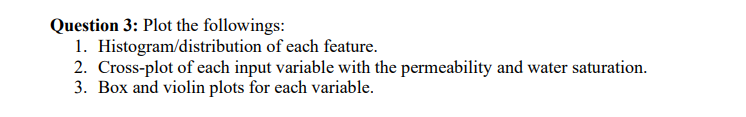

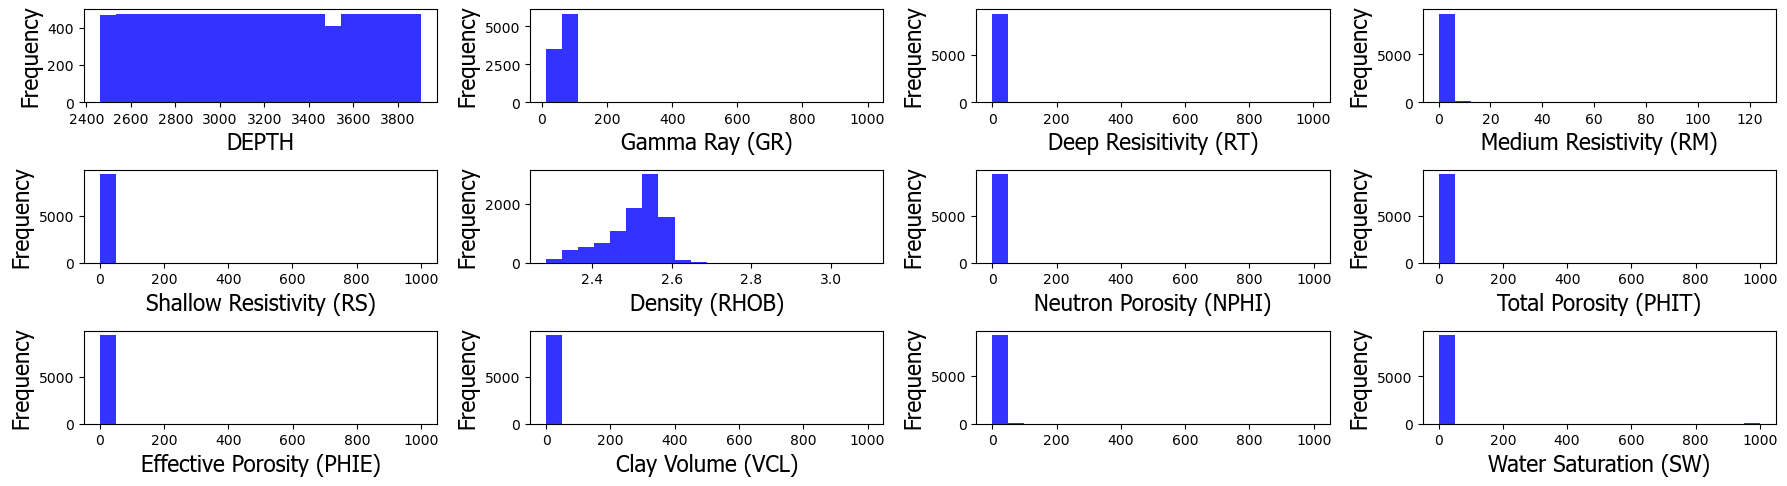

In [23]:
# 1.  Histogram/distribution of each feature
num_bins = 20
alpha = 0.8
fig=plt.figure(figsize=(18,5))

plt.subplot(3,4,1)
plt.hist(Depth,num_bins,facecolor='blue', alpha=alpha)
plt.xlabel('DEPTH',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,2)
plt.hist(GR,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Gamma Ray (GR)', fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,3)
plt.hist(RT,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Deep Resisitivity (RT)', fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,4)
plt.hist(RM,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Medium Resistivity (RM)', fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,5)
plt.hist(RS,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Shallow Resistivity (RS)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,6)
plt.hist(RHOB,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Density (RHOB)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,7)
plt.hist(NPHI,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Neutron Porosity (NPHI)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,8)
plt.hist(PHIT,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Total Porosity (PHIT)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,9)
plt.hist(PHIE,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Effective Porosity (PHIE)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,10)
plt.hist(VCL,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Clay Volume (VCL)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,11)
plt.hist(Perm,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')

plt.subplot(3,4,12)
plt.hist(SW,num_bins,facecolor='blue',alpha=alpha)
plt.xlabel('Water Saturation (SW)',fontsize=16,fontname='Tahoma')
plt.ylabel('Frequency',fontsize=16,fontname='Tahoma')
              
fig.tight_layout() 
plt.show()

In [24]:
Depth = np.array(Data['DEPTH'])
GR    = np.array(Data['Gamma Ray (GR)'])
RT    = np.array(Data['Deep Resisitivity (RT)'])
RM    = np.array(Data['Medium Resistivity (RM)'])
RS    = np.array(Data['Shallow Resistivity (RS)'])
RHOB  = np.array(Data['Density (RHOB)'])
NPHI  = np.array(Data['Neutron Porosity (NPHI)'])
PHIT  = np.array(Data['Total Porosity (PHIT)'])
PHIE  = np.array(Data['Effective Porosity (PHIE)'])
VCL   = np.array(Data['Clay Volume (VCL)'])
Perm  = np.array(Data['Permeability (Perm)'])
SW    = np.array(Data['Water Saturation (SW)'])

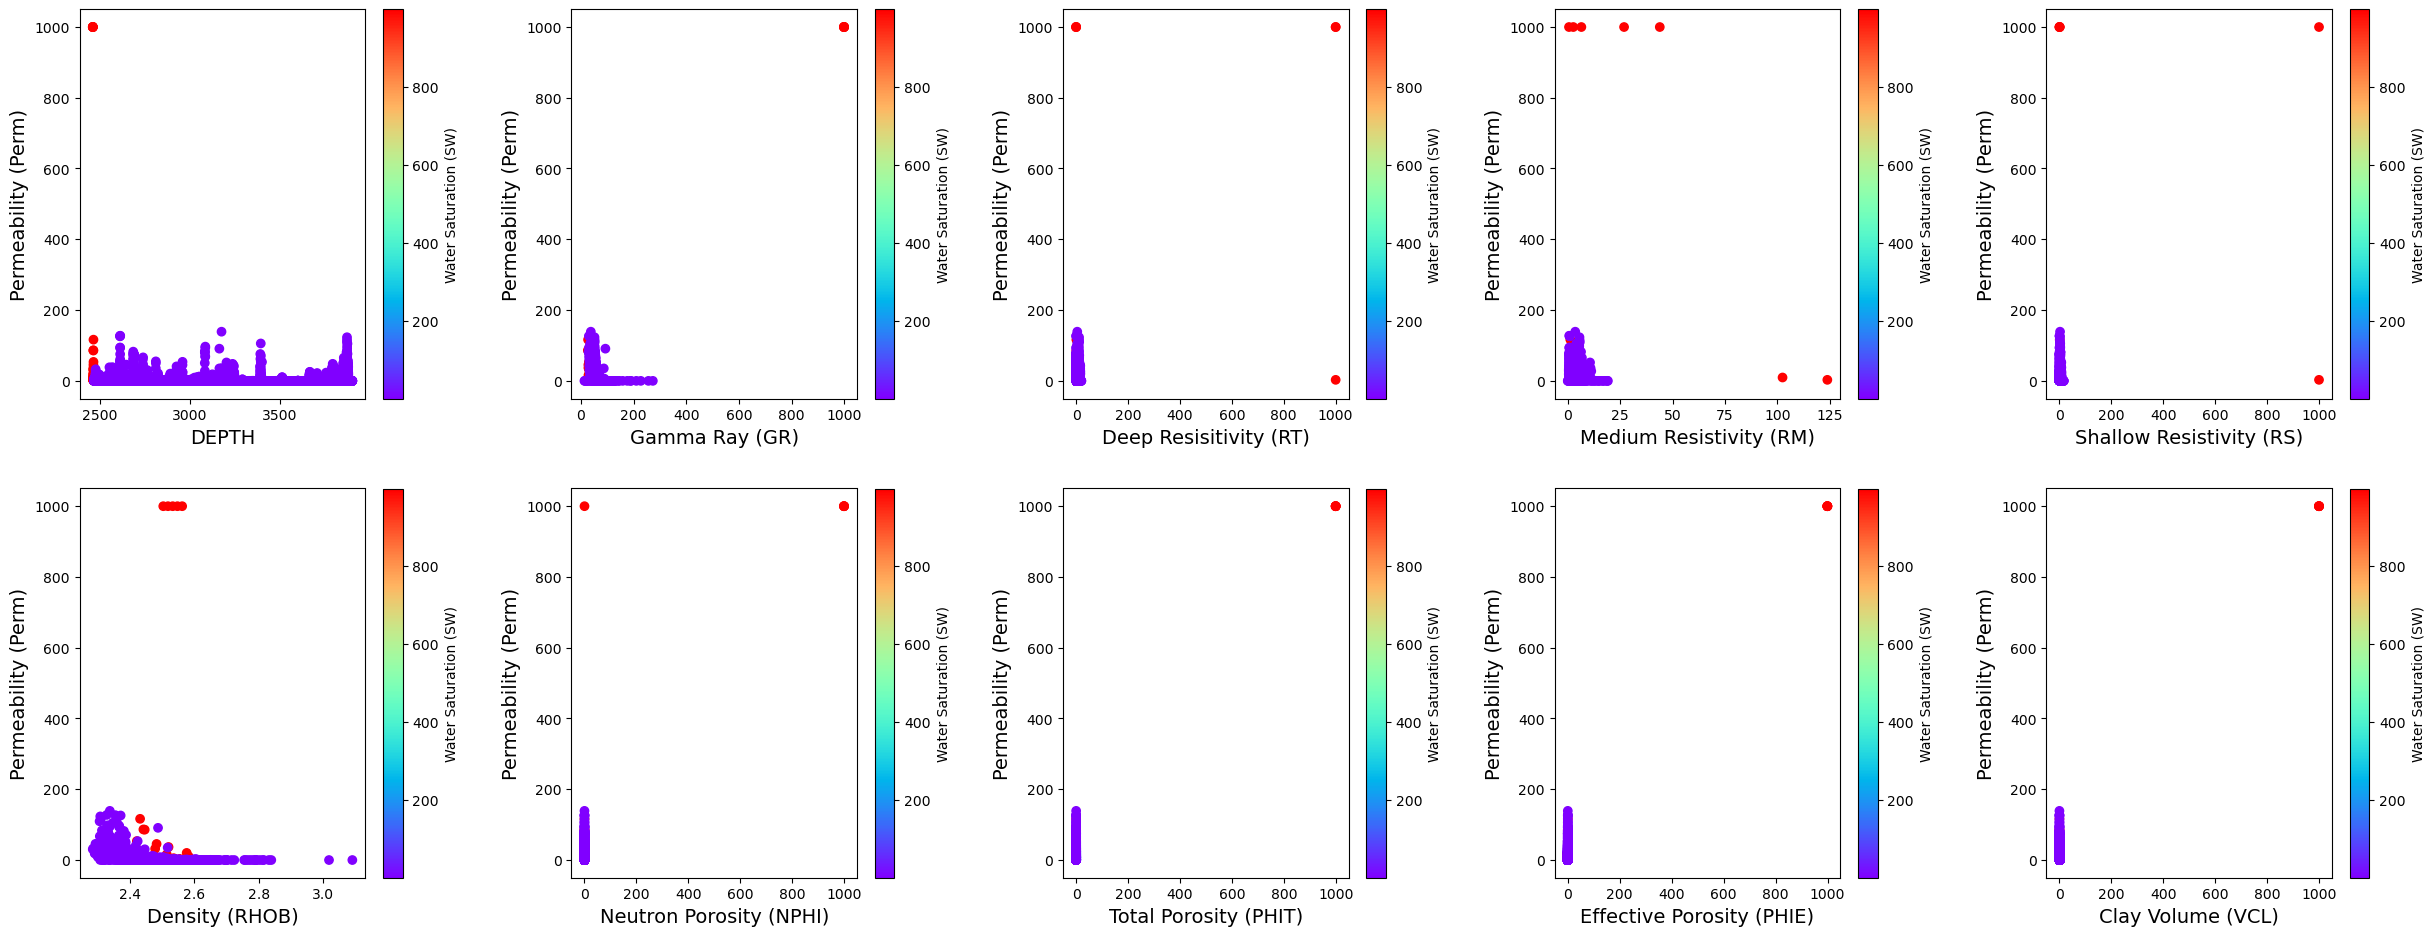

In [25]:
# 2.  Cross-plot of each input variable with the permeability and water saturation.
fig=plt.figure(figsize=(25,10))

plt.subplot(2,5,1)
plt.scatter(x='DEPTH', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('DEPTH', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,2)
plt.scatter(x='Gamma Ray (GR)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Gamma Ray (GR)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,3)
plt.scatter(x='Deep Resisitivity (RT)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Deep Resisitivity (RT)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,4)
plt.scatter(x='Medium Resistivity (RM)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Medium Resistivity (RM)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,5)
plt.scatter(x='Shallow Resistivity (RS)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Shallow Resistivity (RS)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,6)
plt.scatter(x='Density (RHOB)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Density (RHOB)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,7)
plt.scatter(x='Neutron Porosity (NPHI)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Neutron Porosity (NPHI)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,8)
plt.scatter(x='Total Porosity (PHIT)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Total Porosity (PHIT)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,9)
plt.scatter(x='Effective Porosity (PHIE)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Effective Porosity (PHIE)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,10)
plt.scatter(x='Clay Volume (VCL)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Clay Volume (VCL)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

fig.tight_layout(pad = 3.0)
plt.show()

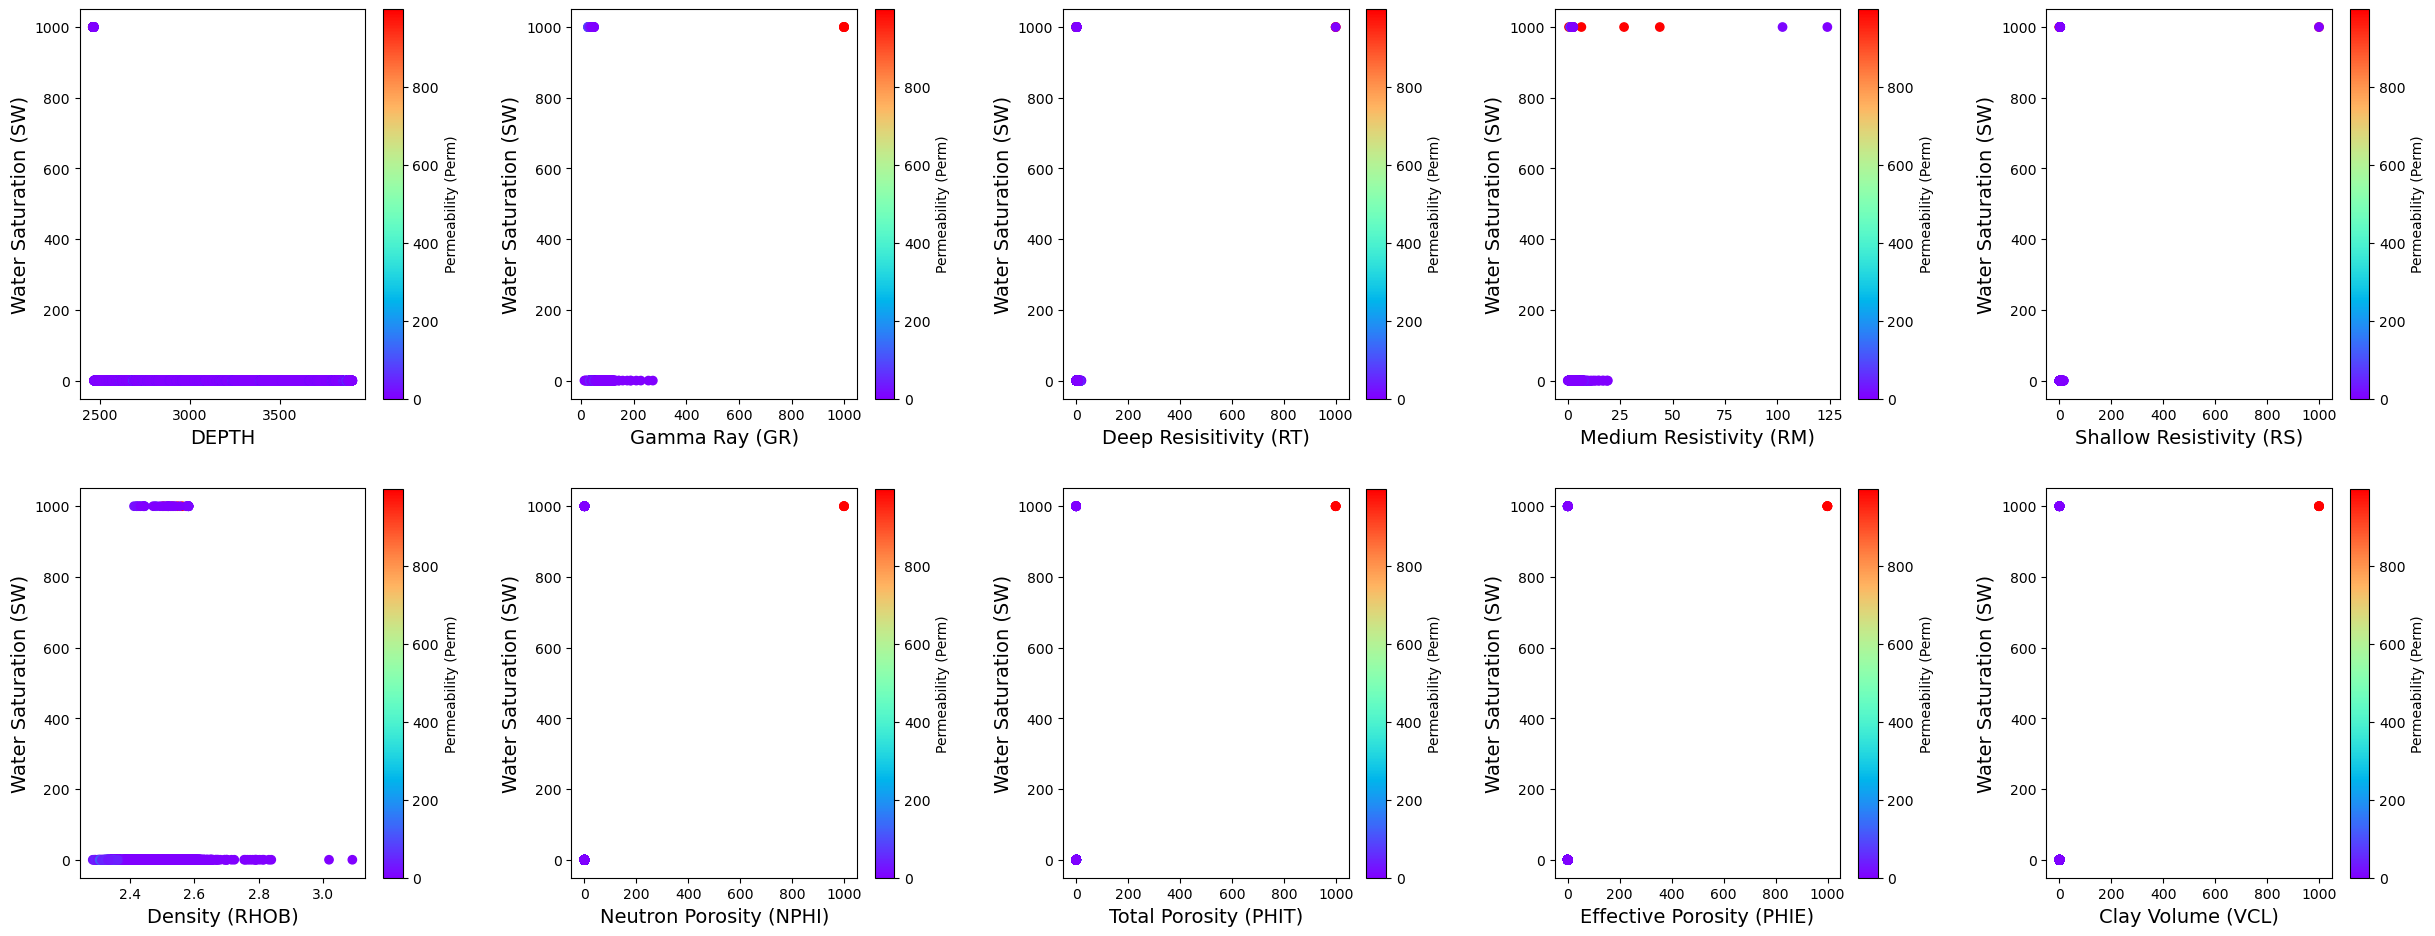

In [26]:
# 2.  Cross-plot of each input variable with the permeability and water saturation.
fig=plt.figure(figsize=(25,10))

plt.subplot(2,5,1)
plt.scatter(x='DEPTH', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('DEPTH', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,2)
plt.scatter(x='Gamma Ray (GR)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Gamma Ray (GR)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,3)
plt.scatter(x='Deep Resisitivity (RT)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Deep Resisitivity (RT)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,4)
plt.scatter(x='Medium Resistivity (RM)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Medium Resistivity (RM)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,5)
plt.scatter(x='Shallow Resistivity (RS)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Shallow Resistivity (RS)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,6)
plt.scatter(x='Density (RHOB)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Density (RHOB)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,7)
plt.scatter(x='Neutron Porosity (NPHI)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Neutron Porosity (NPHI)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,8)
plt.scatter(x='Total Porosity (PHIT)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Total Porosity (PHIT)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,9)
plt.scatter(x='Effective Porosity (PHIE)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Effective Porosity (PHIE)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,10)
plt.scatter(x='Clay Volume (VCL)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Clay Volume (VCL)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

fig.tight_layout(pad = 3.0)
plt.show()

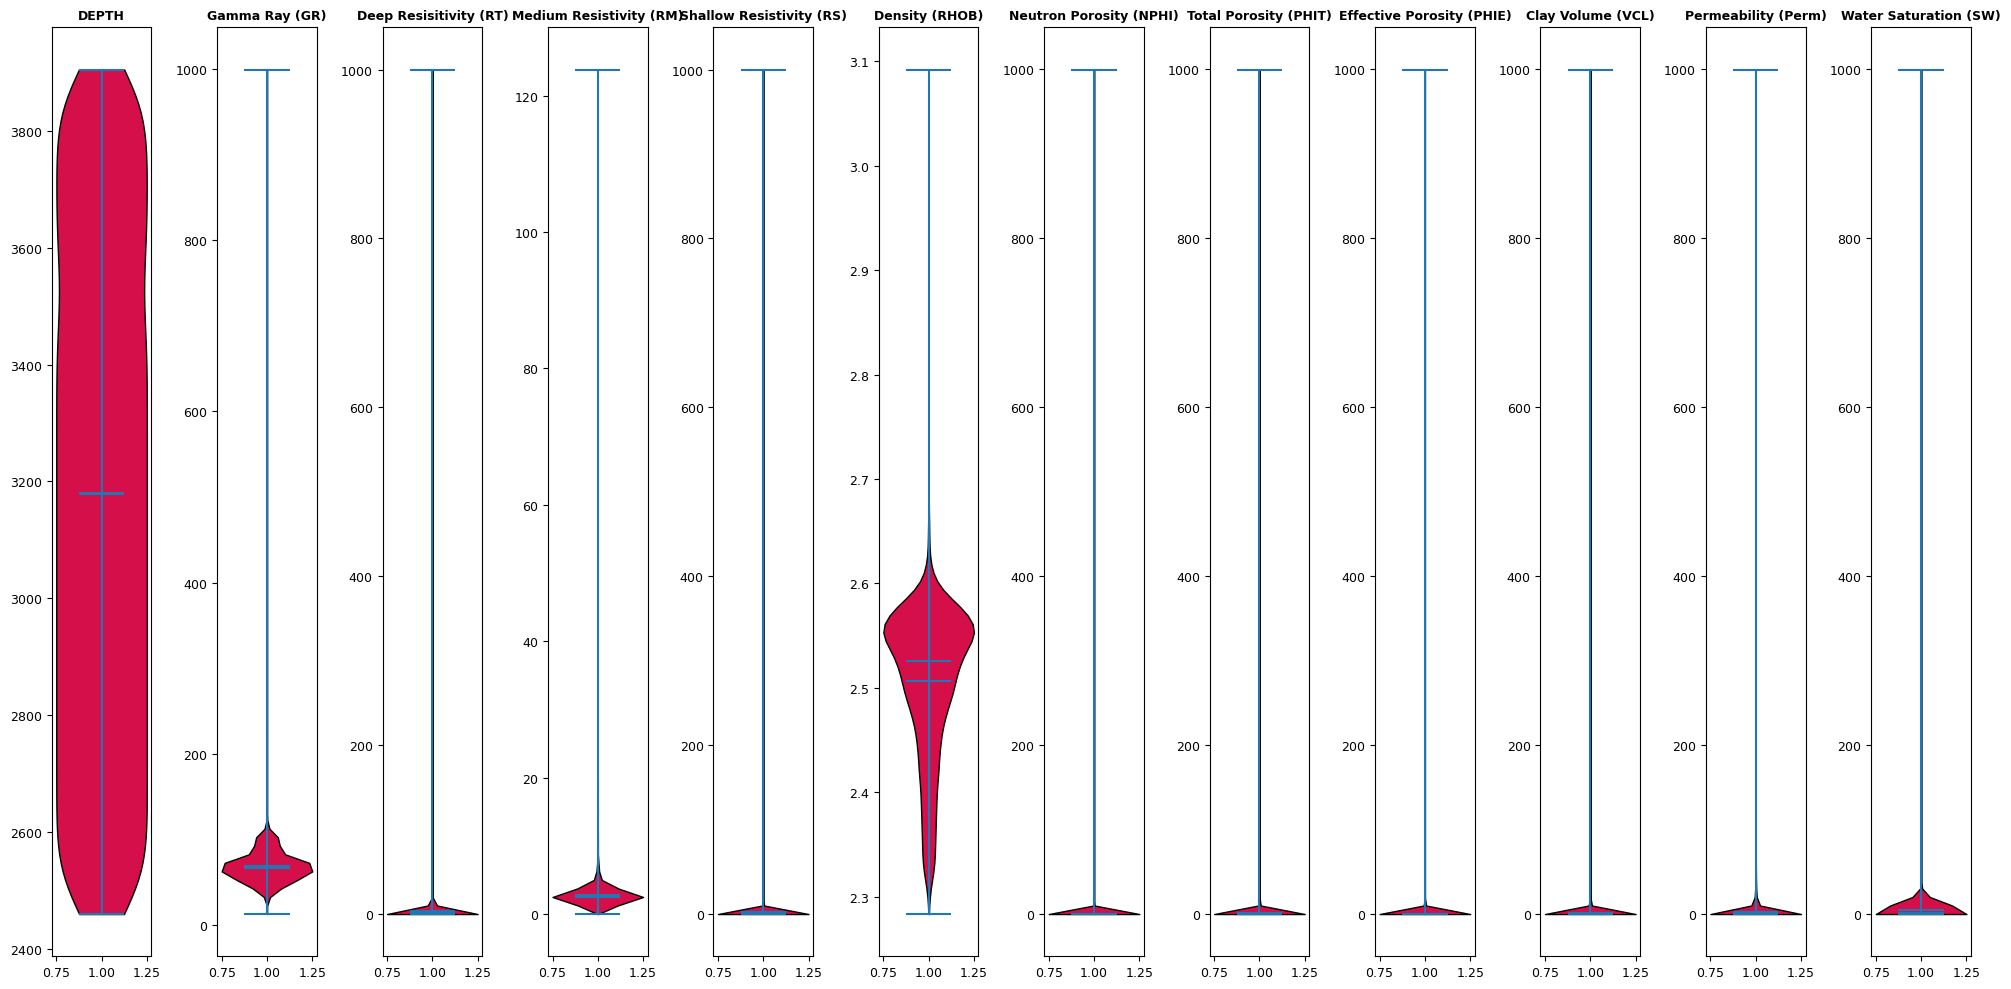

In [27]:
#3.  Box and violin plots for each variable.

## Violin Plots
fig, axs = plt.subplots(1, len(Data.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    parts = ax.violinplot(Data.iloc[:,i], showmeans=True, showmedians=True,showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor('#d50f4a')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    ax.set_title(Data.columns[i], fontsize=9, fontweight='bold')
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()
 

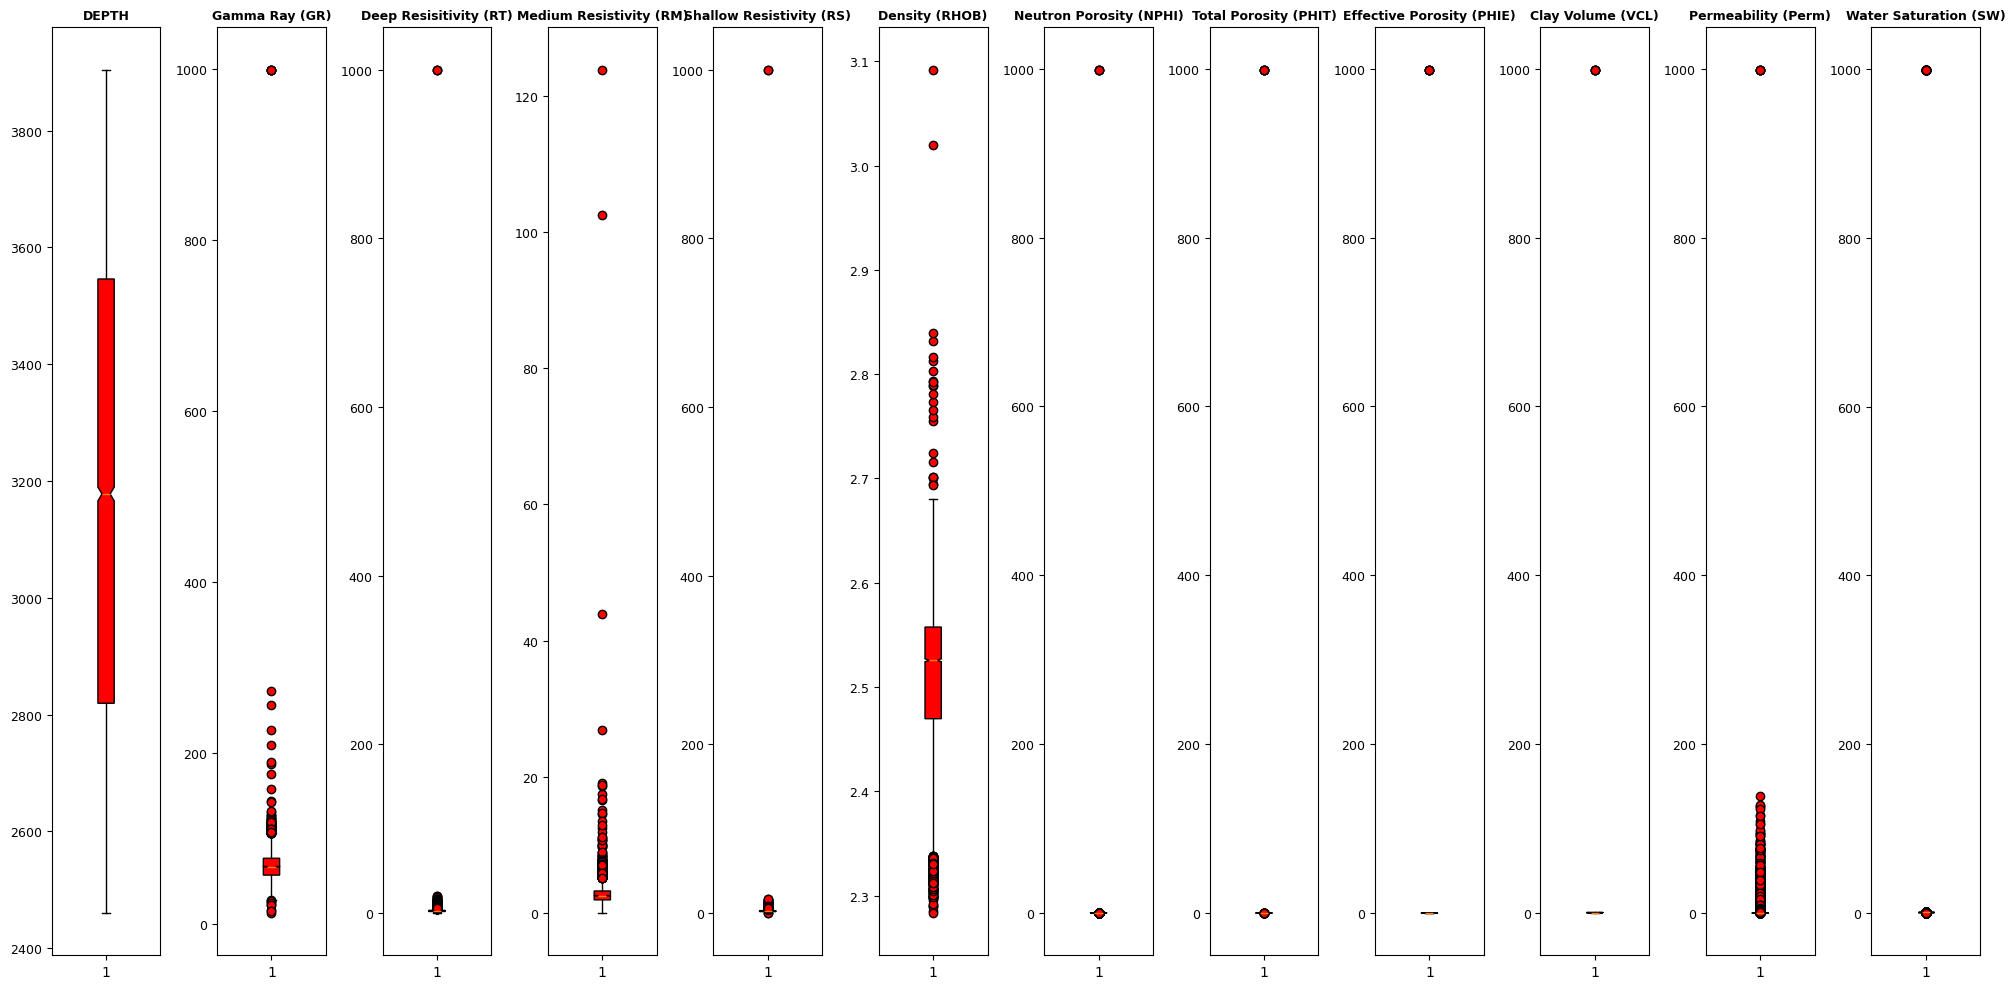

In [28]:
## Box Plots
fig, axs = plt.subplots(1, len(Data.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    bplot = ax.boxplot(Data.iloc[:,i], notch=True, vert=True,patch_artist=True, flierprops = dict(marker = "o", markerfacecolor = "red"))
    for patch, color in  zip(bplot['boxes'], 'red'):
        patch.set_facecolor(color)
    ax.set_title(Data.columns[i], fontsize=9, fontweight='bold')
    ax.tick_params(axis='y', labelsize=9)   
plt.tight_layout()
plt.show()

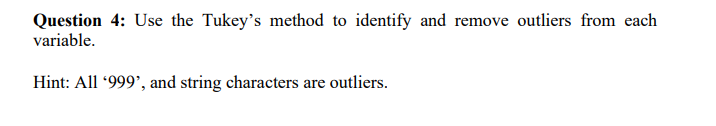

Based on the results from Question 3, we can be 100% sure that GR, RT, RS, NPHI, PHIT, PHIE, VCL, PERM, SW has significant outliers. But Medium Resistivity and Density are free of outliers based on the observations

Gamma Ray (GR) [999.0, 999.0, 999.0, 999.0, 999.0, 187.5053, 209.8775, 175.4996, 144.1484, 127.4066, 127.2442, 130.5133, 142.8717, 132.0756, 189.7066, 255.9683, 272.7926, 227.0152, 158.2102]


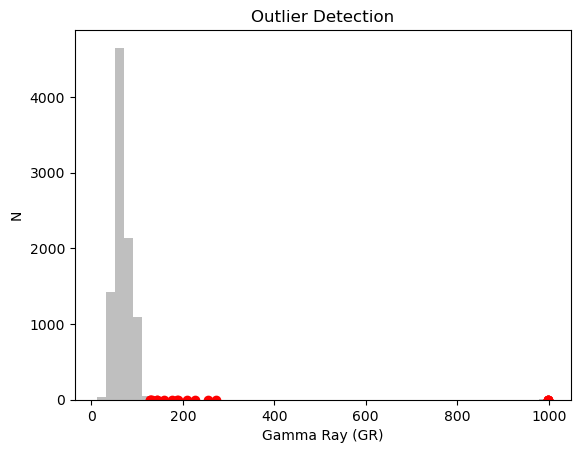

Deep Resisitivity (RT) [1000.0, 1000.0, 1000.0, 7.0966, 7.2775, 7.2606, 6.964, 7.1304, 7.5964, 7.9763, 8.0605, 8.0442, 8.1258, 7.9635, 7.7308, 7.5908, 7.6499, 7.6973, 7.4773, 7.3485, 7.4023, 7.3301, 7.1935, 7.0485, 7.3406, 7.6039, 7.6798, 7.2459, 7.5037, 7.7021, 7.6348, 7.5934, 7.5659, 7.3844, 6.9225, 7.4255, 9.1903, 10.0657, 10.2291, 10.0411, 8.6133, 6.9365, 9.2661, 12.8139, 15.1067, 17.0892, 19.1455, 20.1683, 20.503, 17.3866, 15.1154, 14.2031, 12.9326, 11.6619, 11.5892, 10.8006, 8.7341, 7.2265, 7.5367, 7.6934, 7.8255, 7.6596, 7.3775, 7.2678, 8.2204, 9.1009, 9.1944, 9.3945, 9.2537, 8.5069, 8.1411, 7.8397, 7.0391, 8.4741, 10.0727, 11.0878, 11.5647, 11.4192, 10.7103, 10.6268, 11.0789, 10.0525, 8.2254, 7.3569, 8.0173, 8.0666, 7.4732, 6.9995, 7.6226, 6.948, 7.8216, 12.7459, 7.9355, 8.0632, 7.3334, 7.6383, 13.4131, 19.0471, 7.4806, 12.7738, 6.9856, 8.4805, 7.3783, 7.1588, 7.0292, 8.5638, 7.051, 7.2342, 7.0055, 7.1691, 8.6796, 6.9766, 7.7517, 8.7552, 9.2845, 9.4174, 9.111, 8.37, 8.6828, 8.9

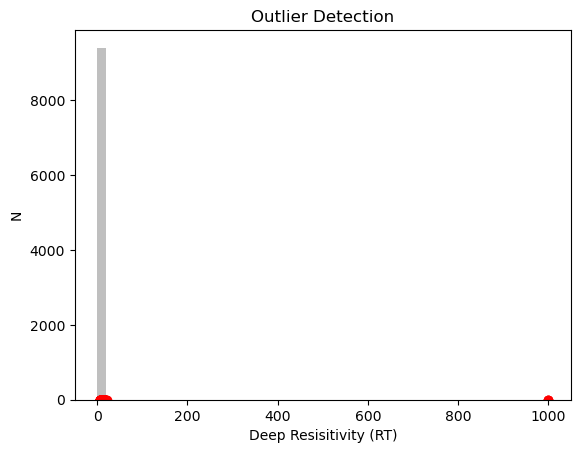

Shallow Resistivity (RS) [1000.0, 1000.0, 6.0344, 6.1868, 6.0615, 5.9188, 5.9332, 6.2748, 6.4249, 6.5464, 6.1021, 6.0513, 7.4076, 7.7292, 7.707, 7.4516, 6.2158, 7.4423, 10.506, 12.0654, 14.072, 15.7869, 16.3544, 16.1826, 14.1756, 12.5902, 12.9478, 13.1042, 12.5804, 12.6995, 10.3572, 7.3246, 6.2248, 6.4581, 6.7817, 7.0328, 6.9319, 6.6036, 6.0598, 6.1775, 5.9247, 6.0865, 6.0395, 5.9177, 6.6035, 7.1468, 7.4302, 7.3951, 7.3242, 8.1318, 9.1605, 8.0936, 6.3206, 5.9167, 6.3302, 6.1978, 5.9507, 6.3906, 7.6369, 6.2646, 5.9147, 5.9146, 6.7925, 6.5546, 6.6883, 6.2284, 6.4274, 11.0545, 17.0047, 6.1853, 8.3969, 6.0116, 6.1961, 6.0881, 7.4702, 6.5025, 6.4567, 6.0066, 6.414, 6.9056, 6.3288, 6.6947, 6.8857]


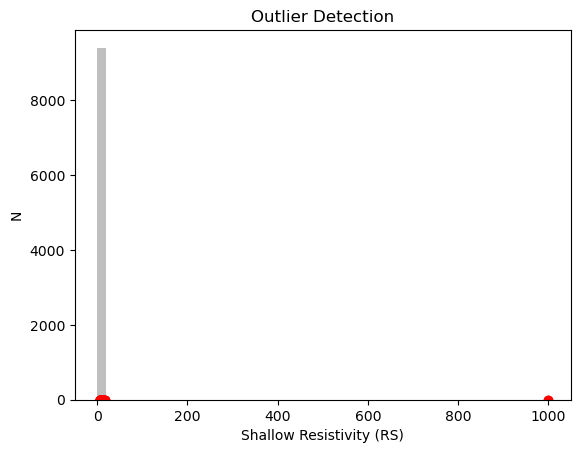

Neutron Porosity (NPHI) [999.0, 999.0, 999.0, 999.0, 0.4545, 0.434, 0.4797, 0.0727, 0.0713, 0.0803, 0.0695, 0.0628, 0.0651, 0.055, 0.0549, 0.0495, 0.0632, 0.4383, 0.4375, 0.4228]


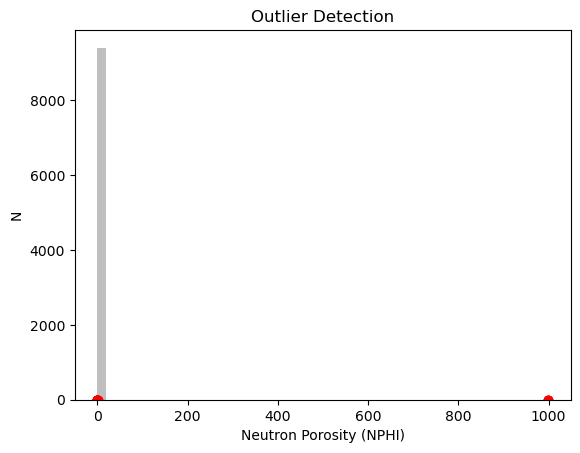

Total Porosity (PHIT) [999.0, 999.0, 999.0, 999.0, 999.0]


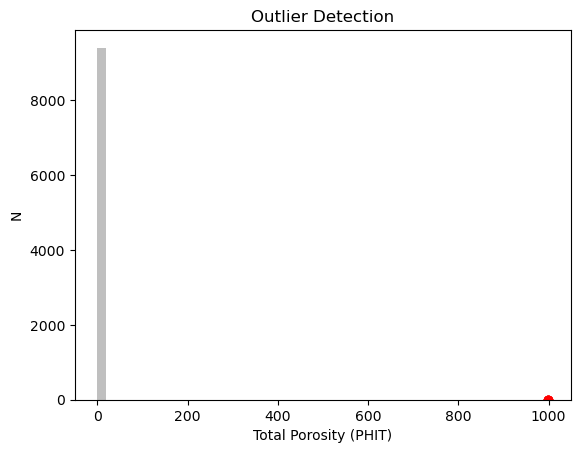

Effective Porosity (PHIE) [999.0, 999.0, 999.0, 999.0, 999.0]


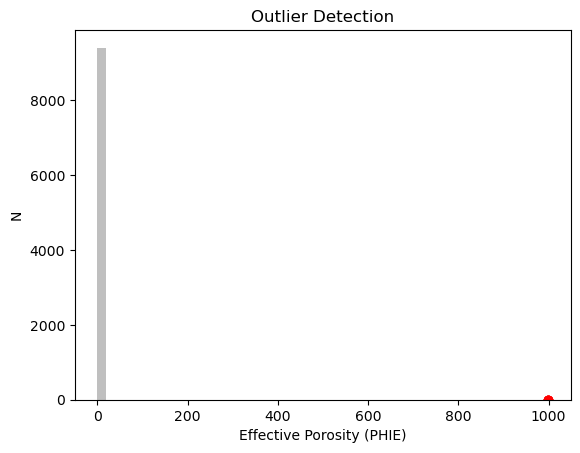

Clay Volume (VCL) [999.0, 999.0, 999.0, 999.0, 999.0]


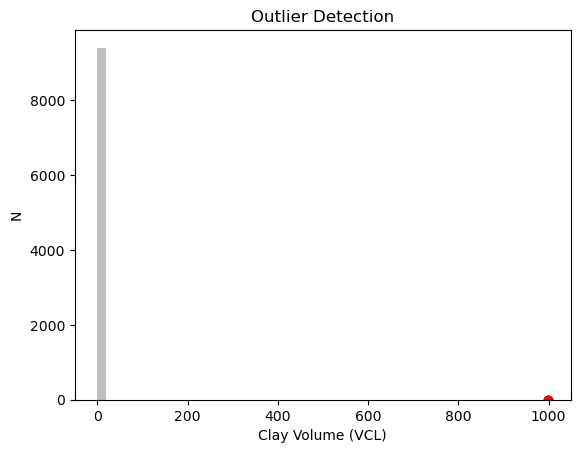

Permeability (Perm) [999.0, 999.0, 999.0, 999.0, 999.0, 2.8929, 9.5171, 7.8811, 9.71, 8.6459, 4.3762, 4.0397, 3.7328, 9.2577, 20.0989, 4.8484, 3.0416, 5.2275, 31.3045, 31.9044, 85.6795, 86.3795, 36.7069, 15.9128, 45.3865, 116.3422, 53.5361, 19.5836, 18.6844, 2.2602, 1.3008, 2.3043, 2.7248, 3.3557, 1.2865, 0.9591, 5.3359, 1.8956, 2.5906, 1.6222, 1.748, 5.7885, 2.2034, 0.8501, 5.3433, 8.286, 6.8948, 3.9862, 1.8721, 0.9996, 8.204, 19.4147, 11.8308, 6.4025, 2.8649, 6.3836, 8.1328, 12.3632, 28.3743, 32.7062, 18.934, 14.4606, 7.1465, 7.5978, 10.0445, 9.1799, 5.0208, 0.8716, 1.102, 2.3248, 0.9506, 3.3858, 9.1703, 16.8667, 18.055, 11.9515, 4.4219, 2.0353, 3.0783, 6.8535, 2.7085, 1.1559, 4.9205, 2.2687, 0.9249, 1.0254, 0.8945, 1.2829, 1.0972, 1.0018, 1.1694, 1.6157, 2.8641, 3.9637, 2.3371, 2.2579, 2.3168, 1.7627, 2.3883, 2.6831, 1.5757, 3.4849, 0.9736, 2.1507, 4.4716, 2.0776, 1.4524, 3.3394, 6.4806, 7.3244, 5.4874, 6.3882, 9.3848, 13.9906, 9.9861, 4.3785, 1.3061, 2.132, 3.6231, 1.1656, 2.3904, 

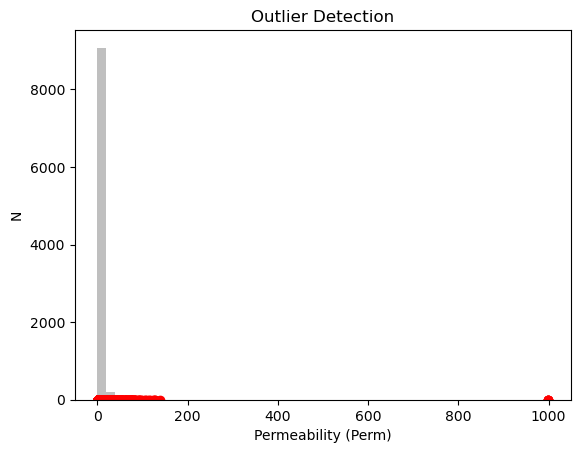

Water Saturation (SW) [999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 0.9379, 0.9804, 0.9738, 0.9954, 0.9443, 0.9423, 0.9953, 0.9892, 0.9876, 0.9919, 0.9006, 0.8896, 0.9492, 0.9804, 0.9768, 0.993, 0.7566, 0.6945, 0.6771, 0.7278, 0.8888, 0.8706, 0.8154, 0.7017, 0.639, 0.625, 0.685, 0.77, 0.9406, 0.9636, 0.9023, 0.6441, 0.5791, 0.5303, 0.5039, 0.4949, 0.563, 0.7117, 0.9868, 0.9973, 0.9298, 0.8671, 0.8061, 0.9868, 0.9374, 0.77, 0.6063, 0.5279, 0.5005, 0.4689, 0.4658, 0.5011, 0.5861, 0.7344, 0.8962, 0.9253, 0.9602, 0.8676, 0.7994, 0.9034, 0.8455, 0.8332, 0.7968, 0.7894, 0.7963, 0.8042, 0.8803, 0.8951, 0.8847, 0.9059, 0.809, 0.7946, 0.6929, 0.6639, 0.7271, 0.8681, 0.8771, 0.8547, 0.8008, 0.8453, 0.9076, 0.8225, 0.7833, 0.6791, 0.5657, 0.5156, 0.491

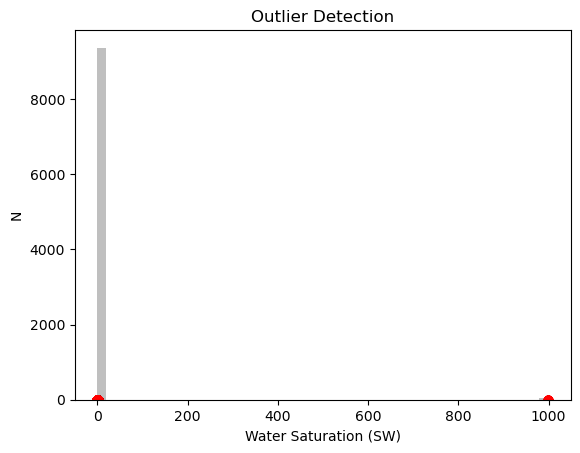

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def tukey_outliers(data, alpha= 2.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - alpha * IQR
    upper_bound = Q3 + alpha * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers
for i in np.array(Data.columns):
    if not i in ['DEPTH','Medium Resistivity (RM)', 'Density (RHOB)']:
        data_tukey = Data[i]
        outliers = tukey_outliers(data_tukey)
        print(i, outliers)

        plt.hist(data_tukey, bins=50, color='gray', alpha=0.5)
        plt.xlabel(i)
        plt.ylabel('N')
        plt.title("Outlier Detection")
        plt.scatter(outliers, [0 for j in range(len(outliers))], color='red')
        plt.show()

# Conbining the results from Tukey's outlier detection and Question 3, we can be sure that the numbers greater than or equal to 999 are outliers

In [30]:
for i in np.array(Data.columns):
    if not i in ['DEPTH','Medium Resistivity (RM)', 'Density (RHOB)']:
        Data = Data[Data[i]<999]

# CROSS PLOTS AFTER REMOVING OUTLIERs

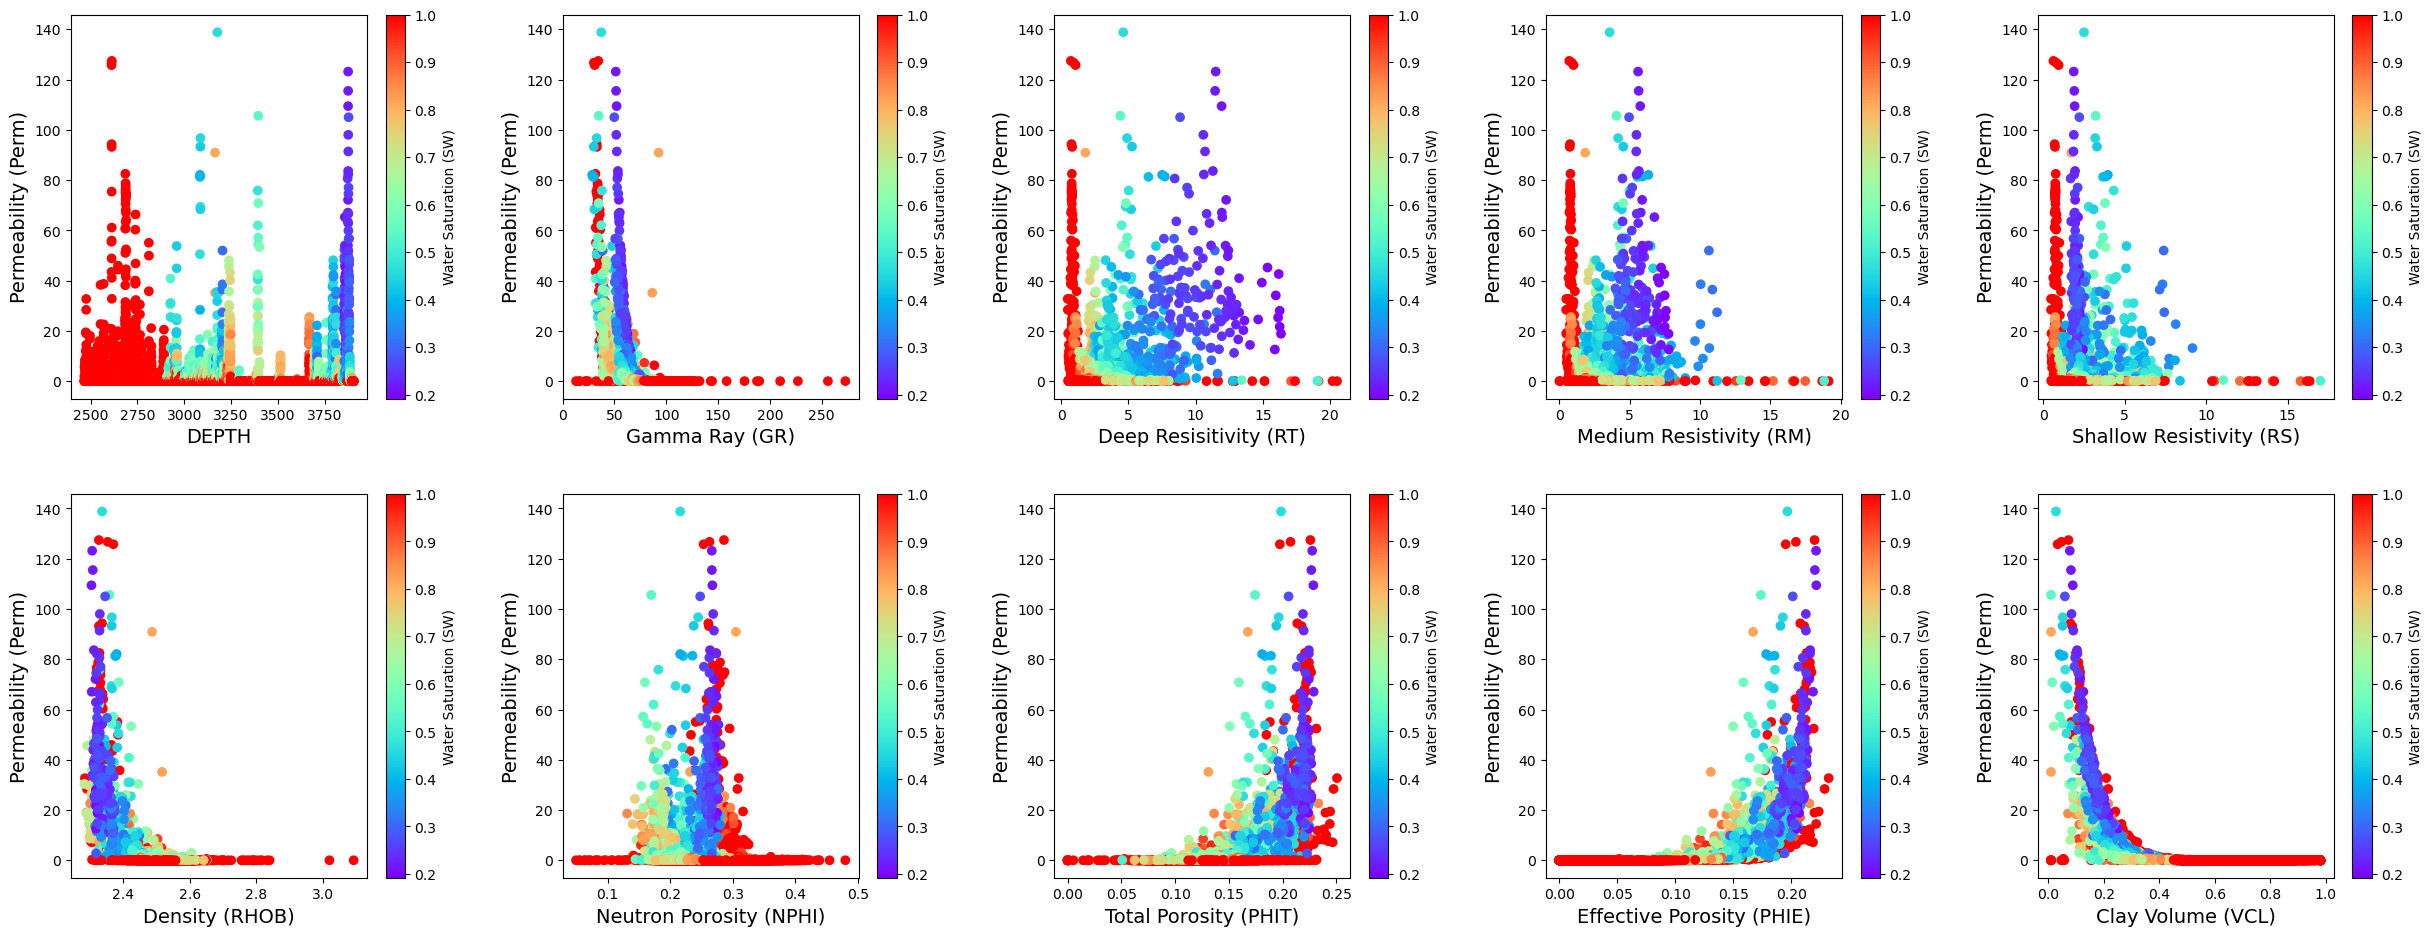

In [31]:
# 2.  Cross-plot of each input variable with the permeability and water saturation.
fig=plt.figure(figsize=(25,10))

plt.subplot(2,5,1)
plt.scatter(x='DEPTH', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('DEPTH', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,2)
plt.scatter(x='Gamma Ray (GR)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Gamma Ray (GR)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,3)
plt.scatter(x='Deep Resisitivity (RT)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Deep Resisitivity (RT)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,4)
plt.scatter(x='Medium Resistivity (RM)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Medium Resistivity (RM)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,5)
plt.scatter(x='Shallow Resistivity (RS)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Shallow Resistivity (RS)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,6)
plt.scatter(x='Density (RHOB)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Density (RHOB)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,7)
plt.scatter(x='Neutron Porosity (NPHI)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Neutron Porosity (NPHI)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,8)
plt.scatter(x='Total Porosity (PHIT)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Total Porosity (PHIT)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,9)
plt.scatter(x='Effective Porosity (PHIE)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Effective Porosity (PHIE)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

plt.subplot(2,5,10)
plt.scatter(x='Clay Volume (VCL)', y='Permeability (Perm)', data=Data, c='Water Saturation (SW)', cmap='rainbow')
plt.ylabel('Permeability (Perm)', fontsize=14)
plt.xlabel('Clay Volume (VCL)', fontsize=14)
plt.colorbar(label='Water Saturation (SW)')

fig.tight_layout(pad = 3.0)
plt.show()

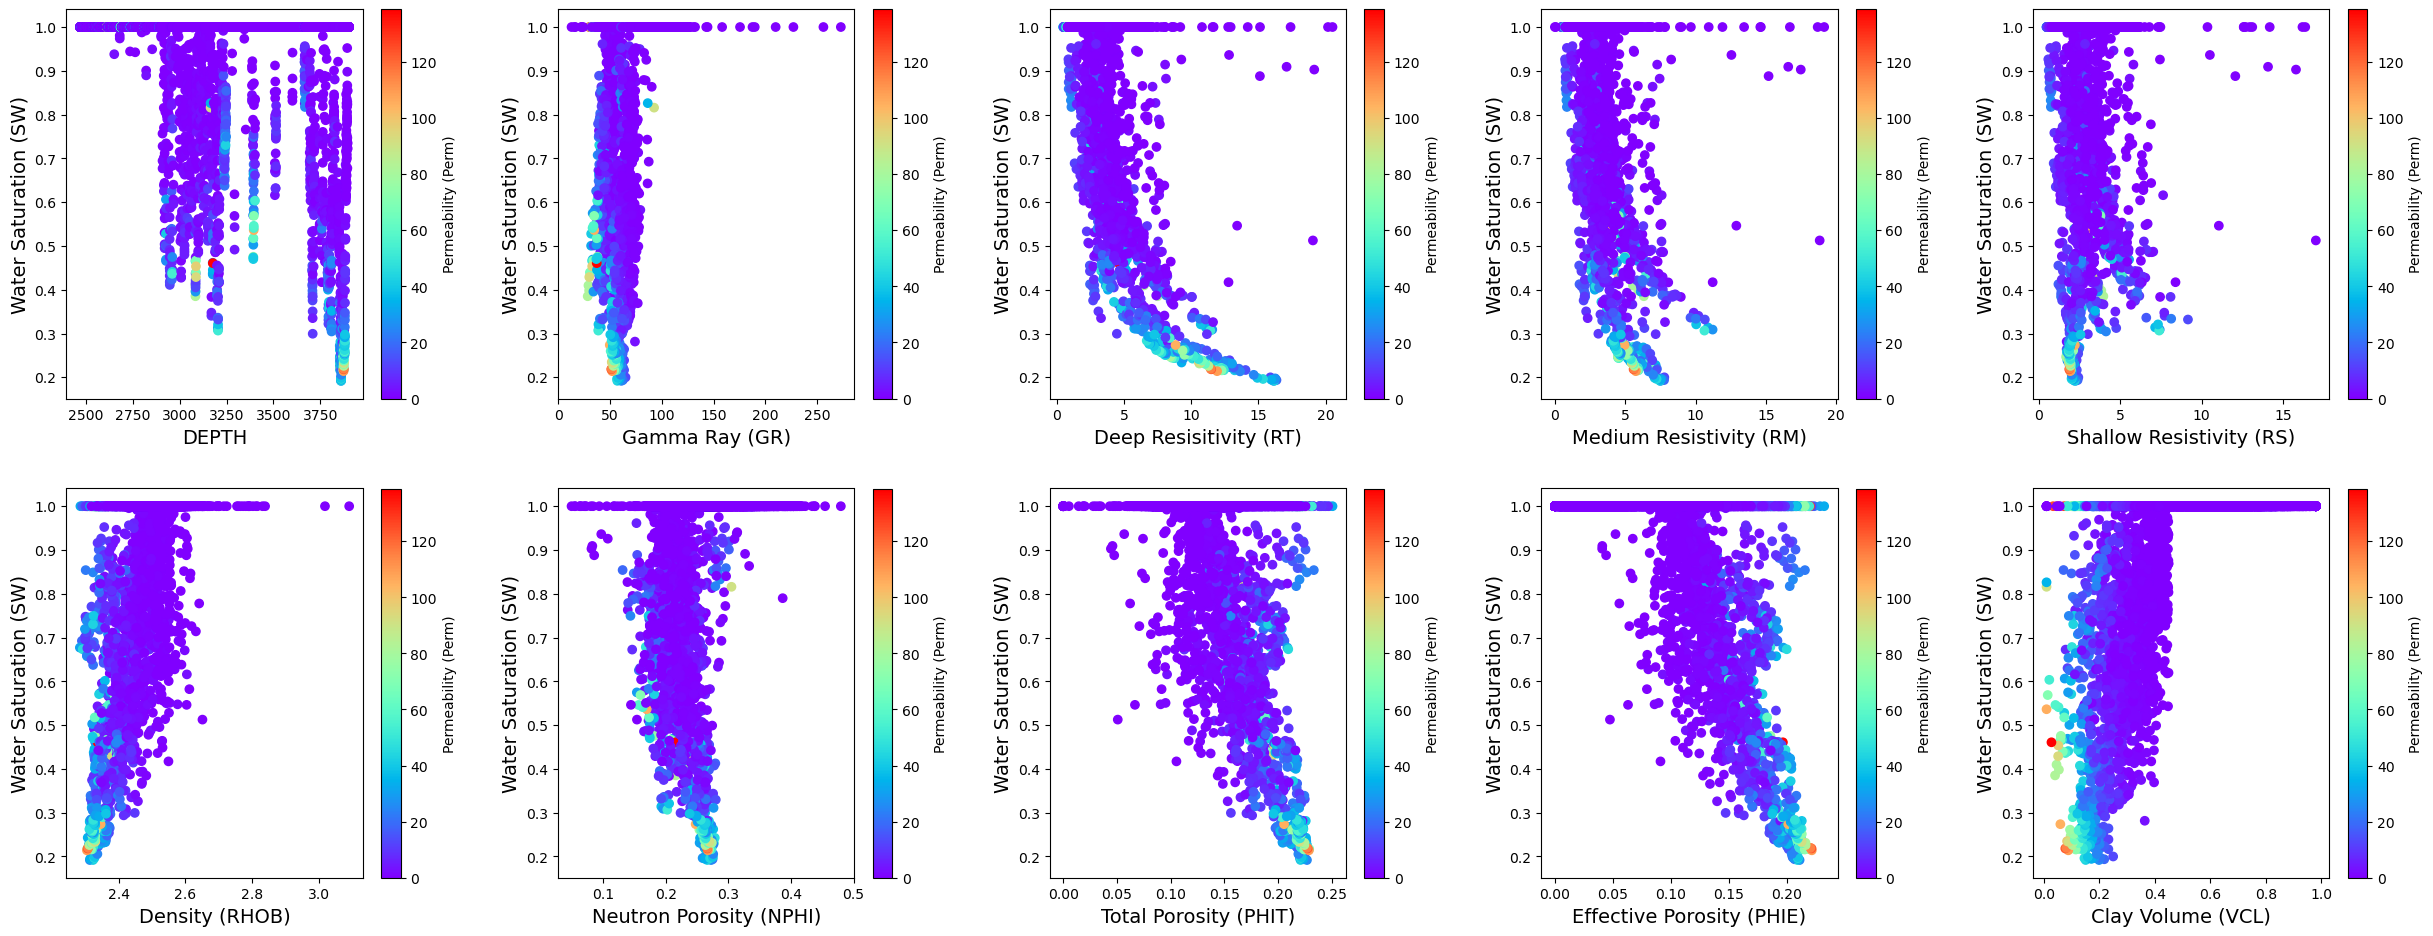

In [32]:
# 2.  Cross-plot of each input variable with the permeability and water saturation.
fig=plt.figure(figsize=(25,10))

plt.subplot(2,5,1)
plt.scatter(x='DEPTH', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('DEPTH', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,2)
plt.scatter(x='Gamma Ray (GR)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Gamma Ray (GR)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,3)
plt.scatter(x='Deep Resisitivity (RT)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Deep Resisitivity (RT)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,4)
plt.scatter(x='Medium Resistivity (RM)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Medium Resistivity (RM)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,5)
plt.scatter(x='Shallow Resistivity (RS)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Shallow Resistivity (RS)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,6)
plt.scatter(x='Density (RHOB)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Density (RHOB)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,7)
plt.scatter(x='Neutron Porosity (NPHI)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Neutron Porosity (NPHI)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,8)
plt.scatter(x='Total Porosity (PHIT)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Total Porosity (PHIT)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,9)
plt.scatter(x='Effective Porosity (PHIE)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Effective Porosity (PHIE)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

plt.subplot(2,5,10)
plt.scatter(x='Clay Volume (VCL)', y='Water Saturation (SW)', data=Data, c='Permeability (Perm)', cmap='rainbow')
plt.ylabel('Water Saturation (SW)', fontsize=14)
plt.xlabel('Clay Volume (VCL)', fontsize=14)
plt.colorbar(label='Permeability (Perm)')

fig.tight_layout(pad = 3.0)
plt.show()